<a href="https://colab.research.google.com/github/Pkolekar940/Bike-sharing-Demand-Prediction/blob/main/Bike_sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike sharing Demand Sharing



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member  -** Pramod Kolekar

# **Project Summary -**

###There are rental bikes in cities to make it easier for people to get around. It's important to have enough bikes available when people need them, so they don't have to wait. But figuring out how many bikes are needed at different times is a challenge. We need to predict how many bikes will be needed each hour to make sure there are always enough for everyone.

# **GitHub Link -**

https://bit.ly/3J0xHxS

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Problem Statement**


* The implementation of rental bikes in urban areas has greatly improved the convenience of transportation, minimizing wait times for the general public. Nevertheless, guaranteeing the availability and accessibility of rental bikes at the appropriate times has emerged as a pressing challenge. To tackle this issue, accurately predicting the necessary bike count for each hour becomes essential in order to sustain a reliable supply of rental bikes.

### Import Libraries

In [367]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [368]:
# Let's import our dataset
import pandas as pd

url = 'https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_csv(url, encoding='latin1')


### Dataset First View

In [369]:
# Let's View the data of random rows to take a glimps of the data
data.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6810,10/09/2018,3298,18,25.9,42,1.1,2000,11.9,0.48,0.0,0.0,Autumn,No Holiday,Yes
871,06/01/2018,105,7,-6.6,65,1.0,1320,-12.0,0.00,0.0,0.0,Winter,No Holiday,Yes
7217,27/09/2018,2189,17,24.3,31,1.5,2000,6.0,1.17,0.0,0.0,Autumn,No Holiday,Yes
4468,05/06/2018,214,4,18.5,72,0.6,1168,13.3,0.00,0.0,0.0,Summer,No Holiday,Yes
7472,08/10/2018,2005,8,9.9,66,1.2,2000,3.8,0.35,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [370]:
# Dataset First Look
data.shape

(8760, 14)

### Dataset Information

In [371]:
# Let's check details about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##Missing values

In [372]:
#check for count of missing values in each column.
data.isna().sum()
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

In [373]:
# let's check is there any ducplicate value present in our data or not
data.duplicated().sum()

0

* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

## ***2. Understanding Your Variables***

In [374]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [375]:
# Let's generate descriptive statistics of a dataset
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description


The Bike Sharing Demand Prediction EDA dataset contains the following variables:

**Date**: The date on which the bike rental took place.

**Rented Bike Count**: The number of bikes that were rented on the given date and time.

**Hour**: The hour of the day at which the bike rental took place (in 24-hour format).

**Temperature(°C)**: The temperature recorded at the time of the bike rental, in degrees Celsius.

**Humidity(%)**: The humidity recorded at the time of the bike rental, as a percentage.

**Wind speed(m/s)**: The wind speed recorded at the time of the bike rental, in meters per second.

**Visibility (10m)**: The visibility recorded at the time of the bike rental, in meters.

**Dew point temperature(°C)**: The dew point temperature recorded at the time of the bike rental, in degrees Celsius.

**Solar Radiation (MJ/m2)**: The solar radiation recorded at the time of the bike rental, in megajoules per square meter.

**Rainfall(mm)**: The amount of rainfall recorded at the time of the bike rental, in millimeters.

**Snowfall (cm)**: The amount of snowfall recorded at the time of the bike rental, in centimeters.

**Seasons**: The season in which the bike rental took place (Winter, Spring, Summer, Autumn).

**Holiday**: Whether or not the day on which the bike rental took place was a holiday (Holiday/No Holiday).

**Functioning Day**: Whether or not the bike rental company was operating on the day on which the bike rental took place (Yes/No).

In [376]:
# Rename the complex columns name
data=data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [377]:
# creating new dataframe in order to apply some staticle
num_dat=data[['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall']]

We can clearly see here Hour, Tempreature, Dew point tempreature and Solar Radiation highly correlated with Rented Bike Count

In [378]:
# Let's retrieve the column names from our dataset.
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### Check Unique Values for each variable.

In [379]:
# Let's Check Unique Values for each variable.

for ele in data.columns.to_list():
  print(f'Number of unique values in {ele} is {data[ele].nunique()}.')

Number of unique values in Date is 365.
Number of unique values in Rented_Bike_Count is 2166.
Number of unique values in Hour is 24.
Number of unique values in Temperature is 546.
Number of unique values in Humidity is 90.
Number of unique values in Wind_speed is 65.
Number of unique values in Visibility is 1789.
Number of unique values in Dew_point_temperature is 556.
Number of unique values in Solar_Radiation is 345.
Number of unique values in Rainfall is 61.
Number of unique values in Snowfall is 51.
Number of unique values in Seasons is 4.
Number of unique values in Holiday is 2.
Number of unique values in Functioning_Day is 2.


# **Data Wrangling**

## Converting to datetime datatype

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***





In [380]:
# Let's Converting to datetime datatype
data['Date']=pd.to_datetime(data['Date'])

In [381]:
# Let's extract year from the date module
data['date_year']=data['Date'].dt.year

# Let's extract Months from the date module
data['date_months']=data['Date'].dt.month

# Let's extract Day from the date module
data['date_day']=data['Date'].dt.day_name()


In [382]:
# Let's find value count of date year
data['date_year'].value_counts()

2018    8016
2017     744
Name: date_year, dtype: int64

In [383]:
# Create a new column 'weekdays_weekend' based on 'Date'

data['weekdays_weekend'] = pd.to_datetime(data['Date']).dt.day_name()
data['weekdays_weekend'] = data['weekdays_weekend'].apply(lambda x: 0 if x in ['Saturday', 'Sunday'] else 1 )


In [384]:
# Let's see the value
data['weekdays_weekend'].value_counts()

1    6216
0    2544
Name: weekdays_weekend, dtype: int64

In [385]:
# Let's see random record of our dataset using sample method.
data.sample(5)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_year,date_months,date_day,weekdays_weekend
3824,2018-09-05,2068,8,12.3,53,1.6,2000,2.9,1.09,0.0,0.0,Spring,No Holiday,Yes,2018,9,Wednesday,1
2805,2018-03-27,866,21,13.4,73,1.5,325,8.6,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,3,Tuesday,1
2674,2018-03-22,446,10,4.9,56,1.9,1480,-3.1,1.76,0.0,0.0,Spring,No Holiday,Yes,2018,3,Thursday,1
5505,2018-07-18,982,9,27.2,59,0.4,948,18.4,1.18,0.0,0.0,Summer,No Holiday,Yes,2018,7,Wednesday,1
4574,2018-09-06,1744,14,30.1,35,1.4,1583,12.9,2.53,0.0,0.0,Summer,No Holiday,Yes,2018,9,Thursday,1


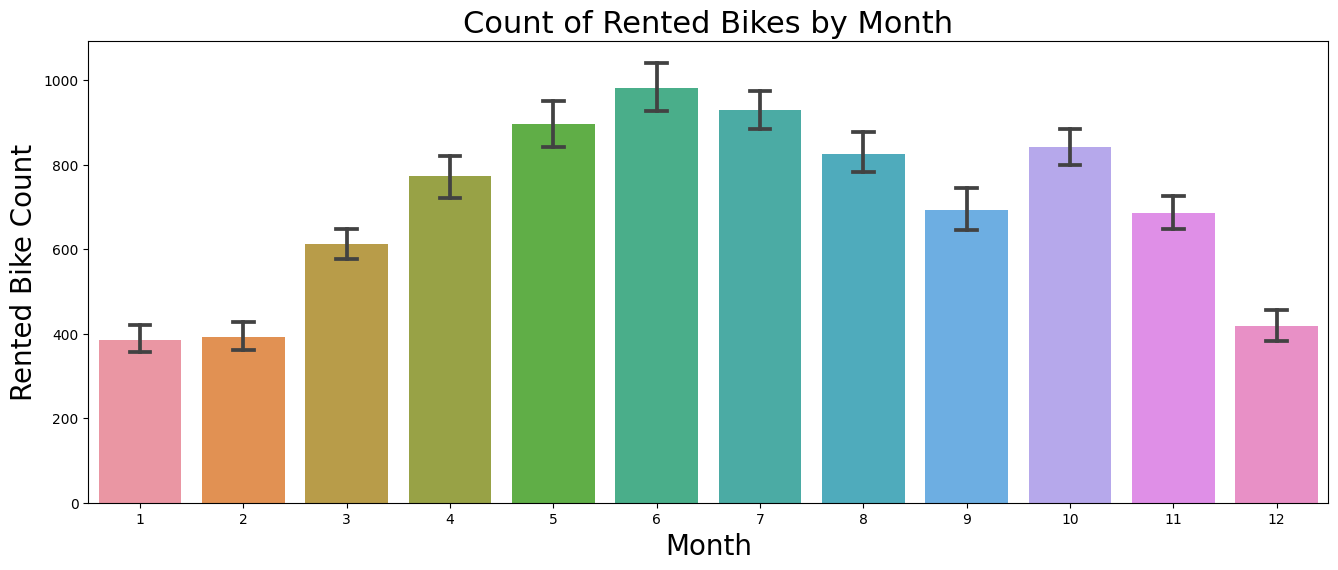

In [386]:
# Let's plot barchart Rented Bike Count VS Months.

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x='date_months', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set_title('Count of Rented Bikes by Month', fontsize=22)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Rented Bike Count', fontsize=20)

plt.show()


*   Why did you pick the specific chart?

1. Bar graphs are easy to read and understand, making them a popular choice for presenting data in reports and presentations.

*   What is/are the insight(s) found from the chart?

1. May, June and July have highest number of average rented bike count.
2. January, February and December have lowest number of average rented bike count.

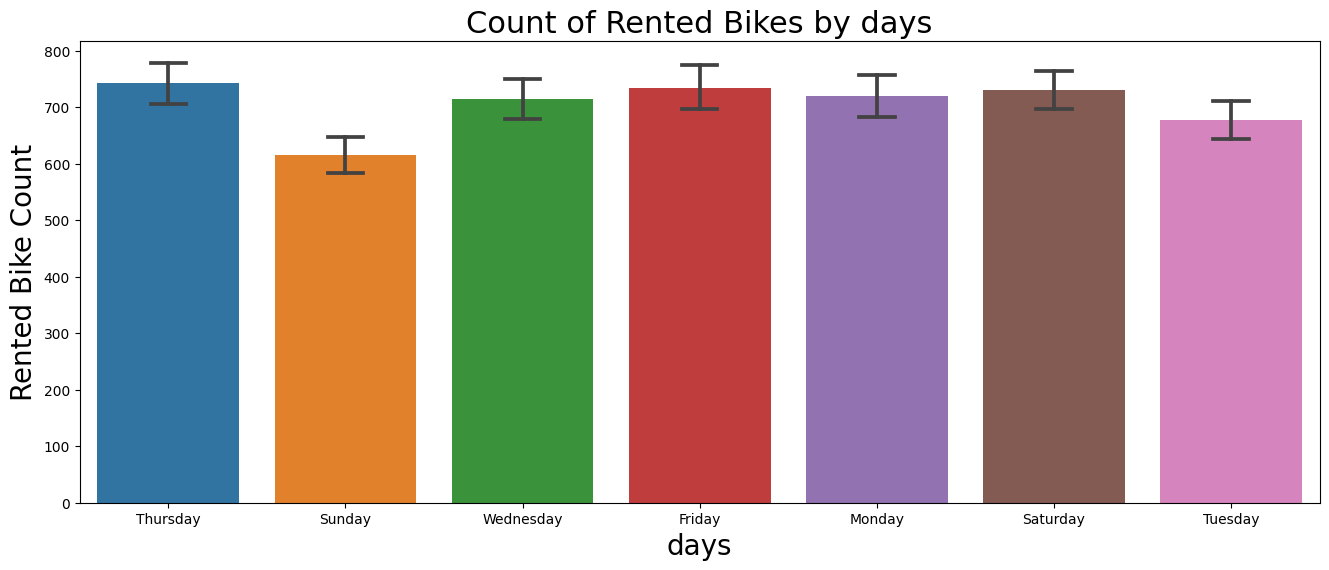

In [387]:
# Let's plot barchart Rented Bike Count VS Days.

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x='date_day', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set_title('Count of Rented Bikes by days', fontsize=22)
ax.set_xlabel('days', fontsize=20)
ax.set_ylabel('Rented Bike Count', fontsize=20)

plt.show()


*   Why did you pick the specific chart?
1. Bar graphs are easy to read and understand, making them a popular choice for presenting data in reports and presentations.


*   What is/are the insight(s) found from the chart?
1. On non-holiday days, the average number of bike rentals is 700, whereas on holidays, the average number of rentals is 500.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

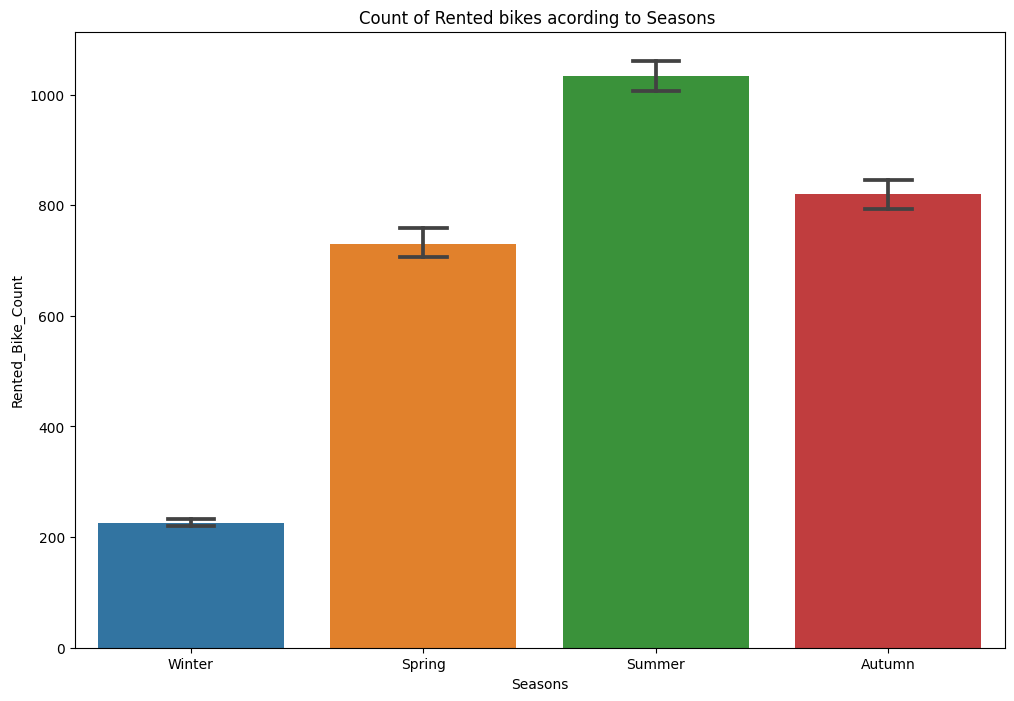

In [388]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(data=data,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

*   Why did you pick the specific chart?
1. A bar chart is a useful visualization tool for categorical data because it provides a clear and concise representation of the distribution and comparison of different categories.

*   What is/are the insight(s) found from the chart?
1. Seasonal variations in bike rental demand are evident, with summer having the highest average rentals (1034), followed by autumn (819) and spring (730). Winter experiences the lowest average rentals (225).

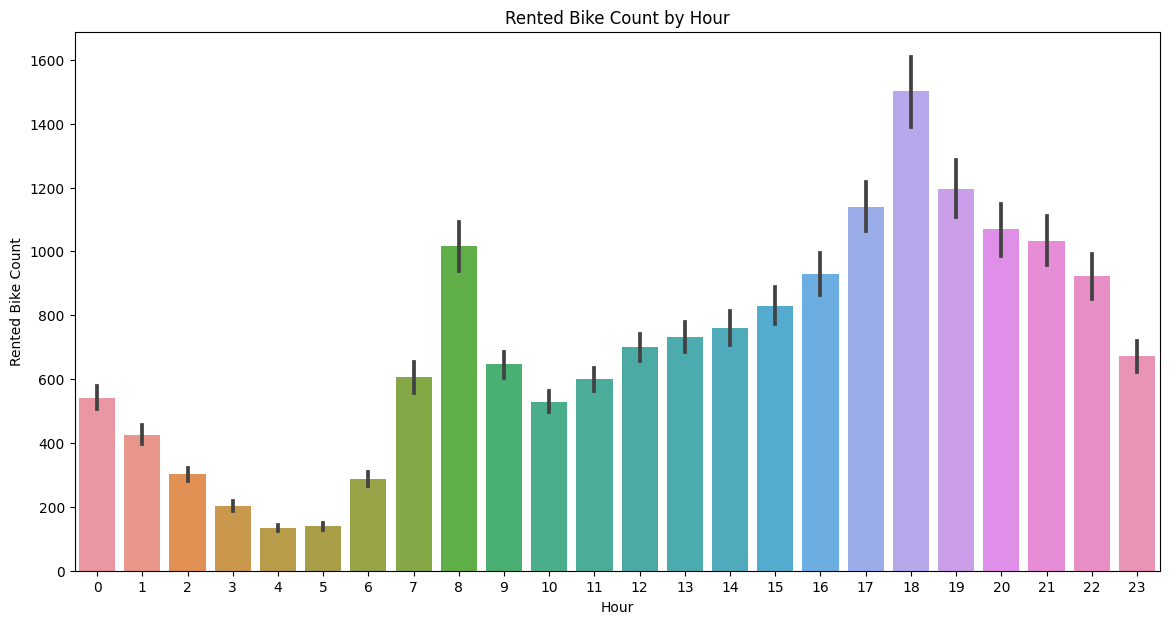

In [389]:
# Create the bar plot using Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x='Hour', y='Rented_Bike_Count', data=data)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Hour')

plt.show()


*   Why did you pick the specific chart?
1. Bar charts are a versatile and widely used visualization tool that helps in understanding and communicating data effectively

*   What is/are the insight(s) found from the chart?
1. Peak Hours:The bar plot reveals that the demand for rented bikes tends to be higher in the morning, particularly at 8 am, and reaches its peak in the evening around 6 o'clock.

2. Off peak hours: The bar plot clearly shows that the demand for rented bikes is at its lowest during the early hours of 4 and 5 in the morning.

In [390]:
# Let's define the temperature bins
bins = [-20, -10, 0, 10, 20, 30, 40]

# Create a new column 'Temperature_Bins' in the DataFrame
data['Temperature_Bins'] = pd.cut(data['Temperature'], bins)

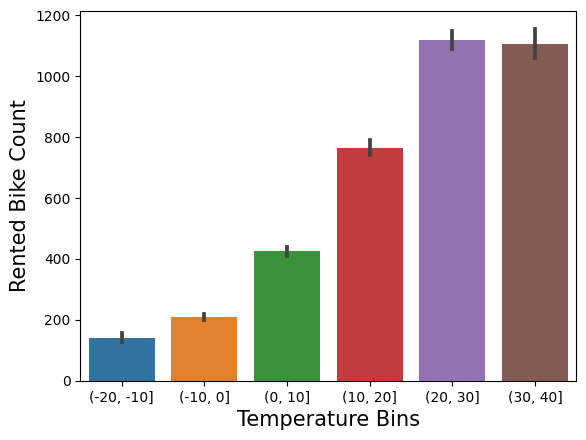

In [391]:
# Let's plot a bar chart to see graph Rented Bike Count vs Temperature
sns.barplot(x=data['Temperature_Bins'], y=data['Rented_Bike_Count'])

# Set the axis labels
plt.xlabel('Temperature Bins' , fontsize=15)
plt.ylabel('Rented Bike Count', fontsize=15)

# Display the plot
plt.show()


*   What is/are the insight(s) found from the chart?
1. Bike rentals peak between 15 to 30 degrees Celsius, assuming a positive correlation between temperature and rental demand.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

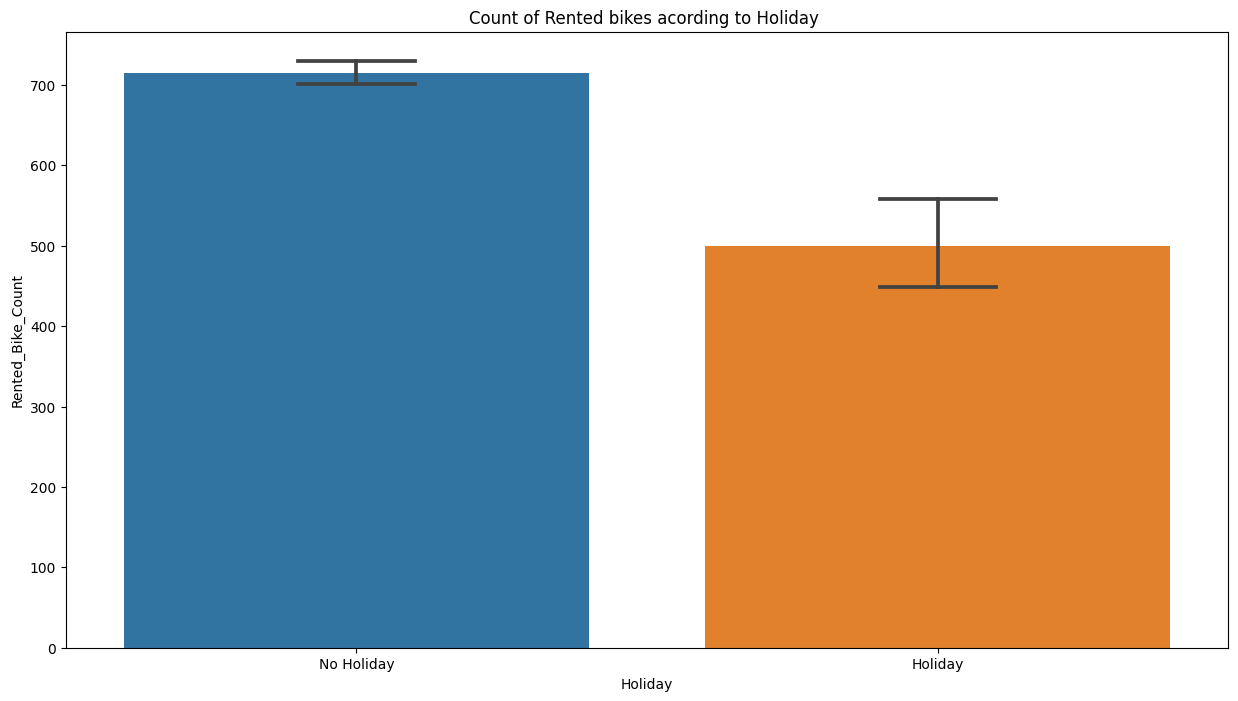

In [392]:
# Let's anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

*   What is/are the insight(s) found from the chart?
1. On non-holiday days, the average
number of bike rentals is 700, whereas on holidays, the average number of rentals is 500.

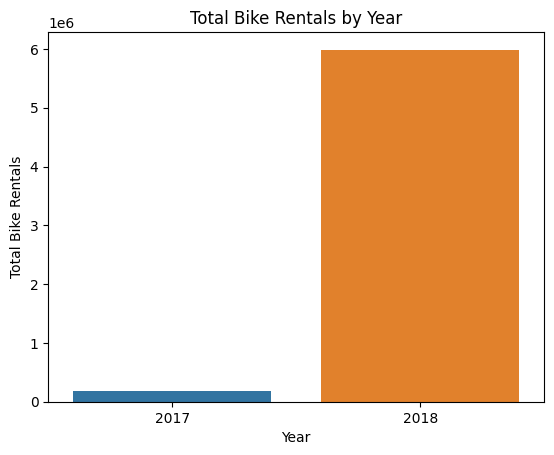

In [393]:
# Let's Group by year and sum the bike rentals
bike_rentals_yearly = data.groupby('date_year')['Rented_Bike_Count'].sum().reset_index()

# Create a bar plot of the total bike rentals by year
sns.barplot(x='date_year', y='Rented_Bike_Count', data=bike_rentals_yearly)

# Set axis labels and plot title
plt.xlabel('Year')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Year')

# Show the plot
plt.show()

**Insights**

In 2017, the average number of bikes was **185,330**, while in 2018, the average number of rented bikes increased to **5,986,984.**

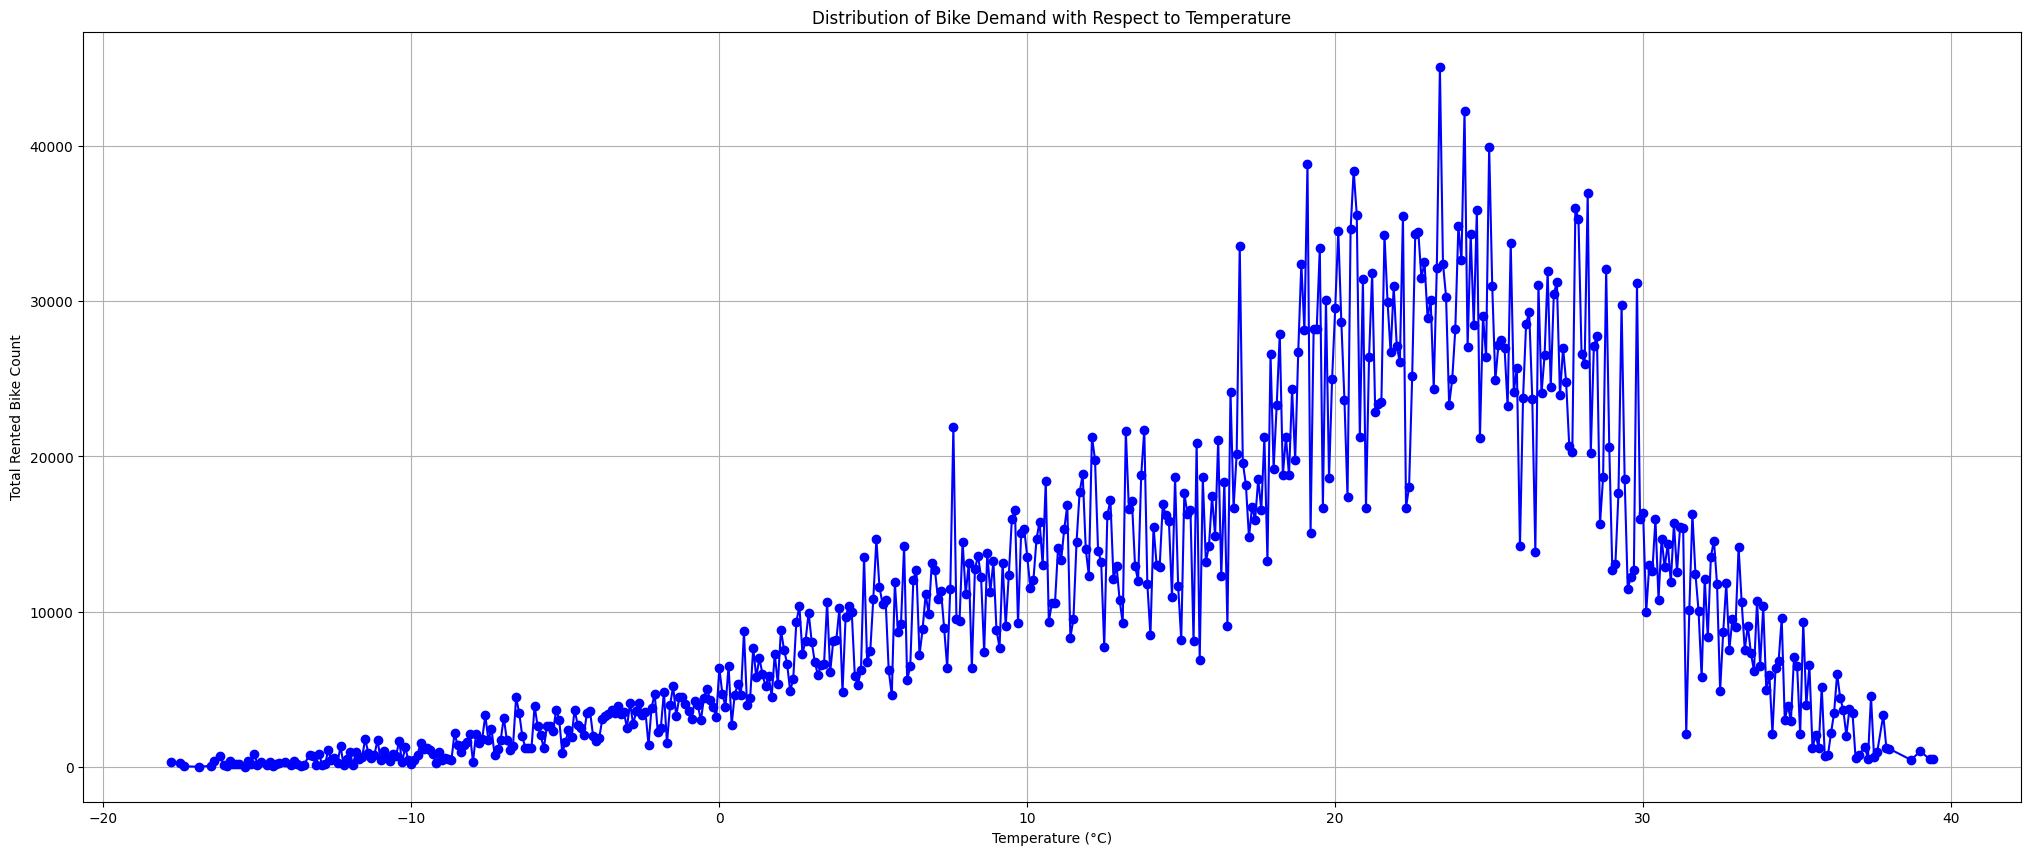

In [394]:
# Let's Calculate the total Rented Bike Count for each temperature
counts_temp = data.groupby('Temperature')['Rented_Bike_Count'].sum()

# Plot the distribution of bike demand with respect to temperature
plt.figure(figsize=(25, 10))
plt.plot(counts_temp.index, counts_temp.values, marker='o', linestyle='-', color='b')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rented Bike Count')
plt.title('Distribution of Bike Demand with Respect to Temperature')
plt.grid(True)
plt.show()


*   Why did you pick the specific chart?
1. line charts are valuable for visualizing trends, comparisons, and patterns over time or across continuous variables.

*   What is/are the insight(s) found from the chart?
1. Majority of bikes were rented when temperature varries from 15°C to 30°C.
2. Very few bikes were rented when temperature is negative(i.e. Snowfall).

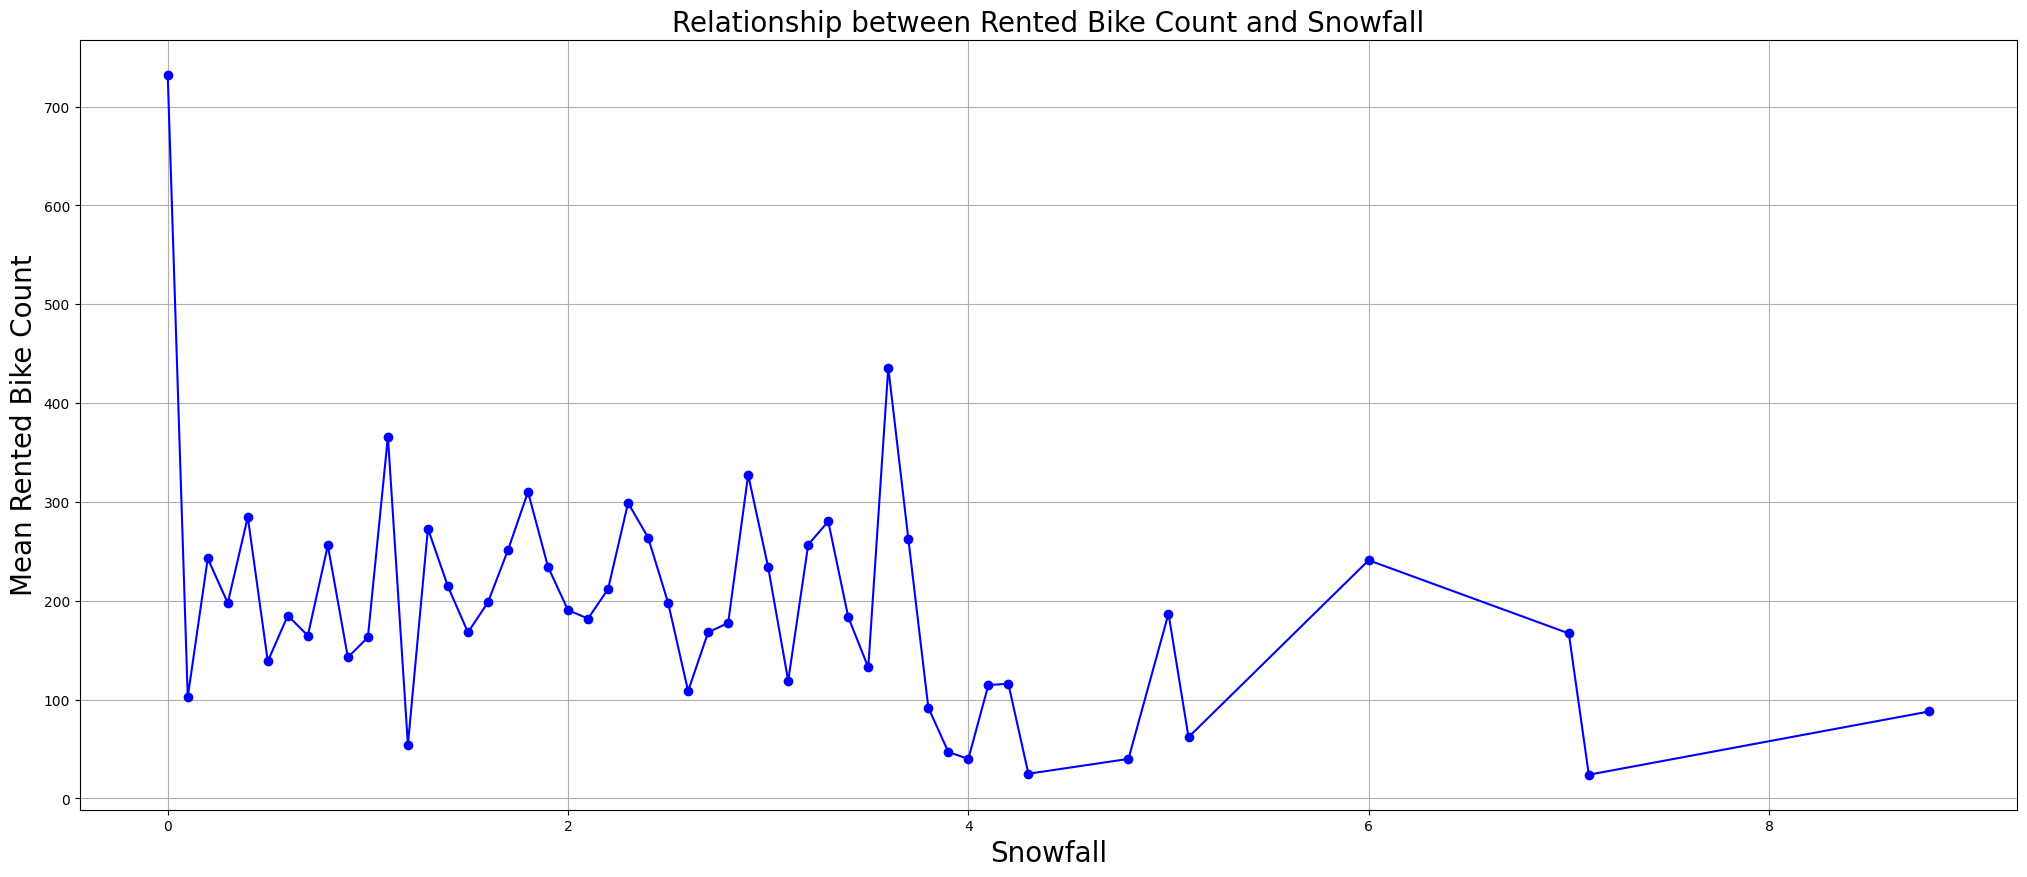

In [395]:
# Let's plot a graph about Relationship between Rented Bike Count and Snowfall .
# Group the data by 'Snowfall' and calculate the mean of 'Rented_Bike_Count'
grouped_data = data.groupby('Snowfall')['Rented_Bike_Count'].mean()

# Plotting the relationship between 'Rented_Bike_Count' and 'Snowfall'
plt.figure(figsize=(25,10))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Snowfall',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Snowfall',fontsize=20)
plt.grid(True)
plt.show()


*   Why did you pick the specific chart?
1. Line chart  provide a clear and concise representation of data, making it easier to interpret and communicate insights effectively.

*   What is/are the insight(s) found from the chart?
1. We can say that snowfall is not that correleted with rented bike like tempreture does.

# ***. Data Vizualization Analysis***

### **Univariate Analysis**

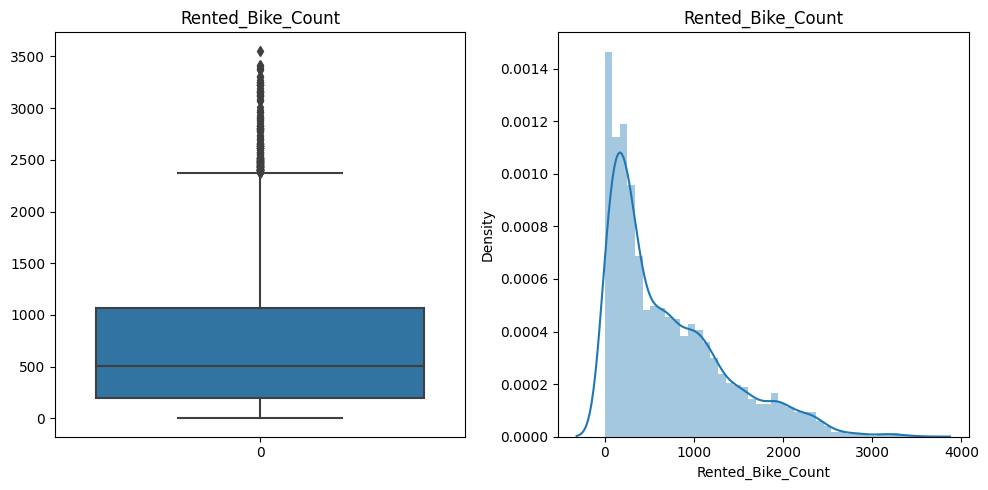

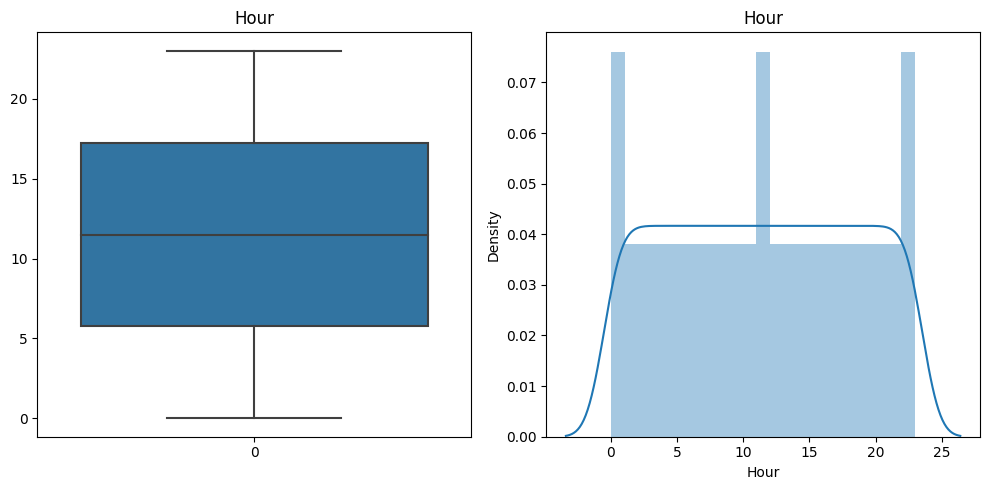

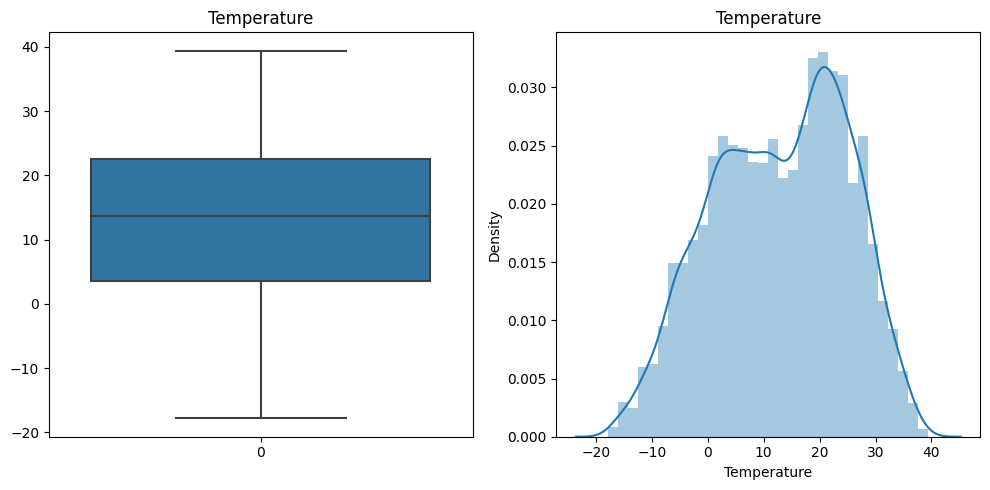

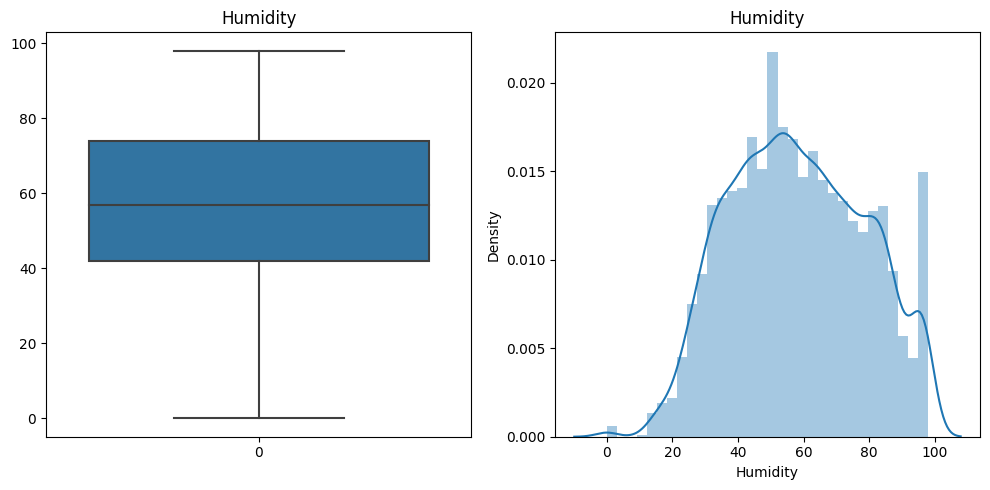

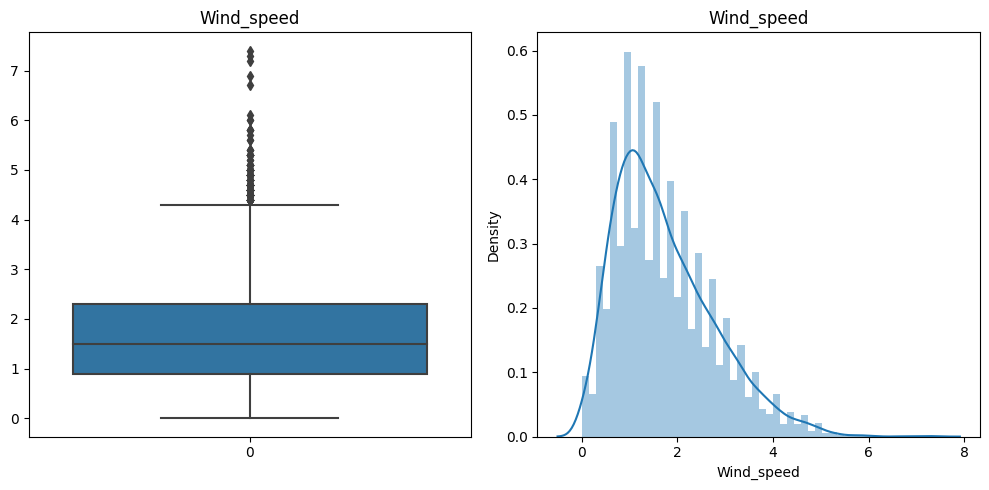

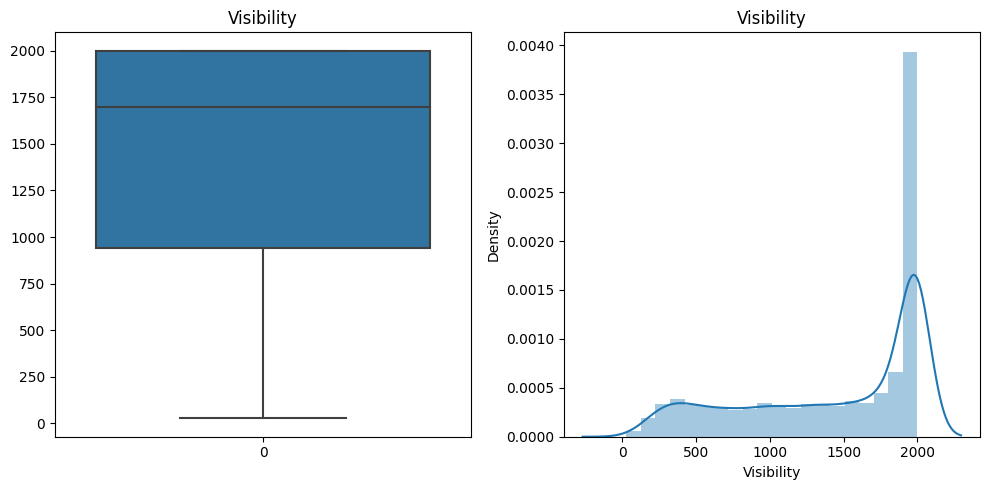

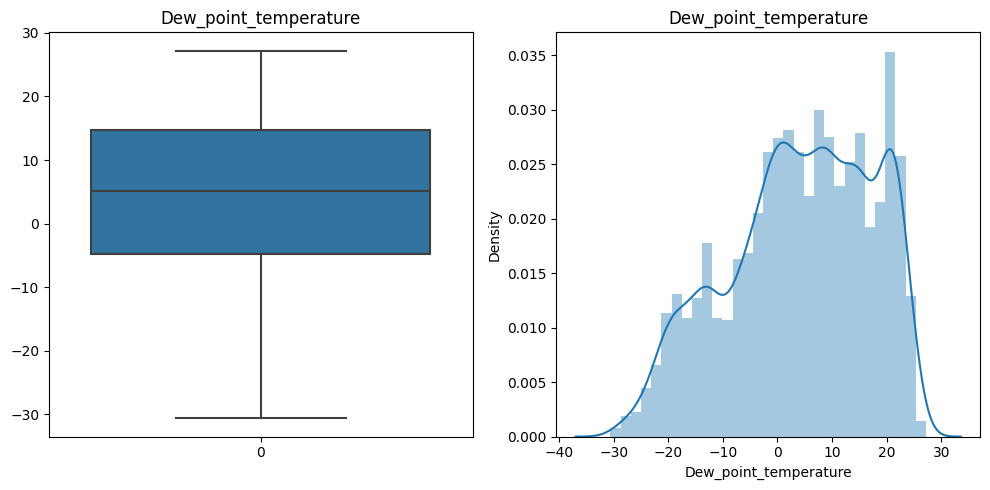

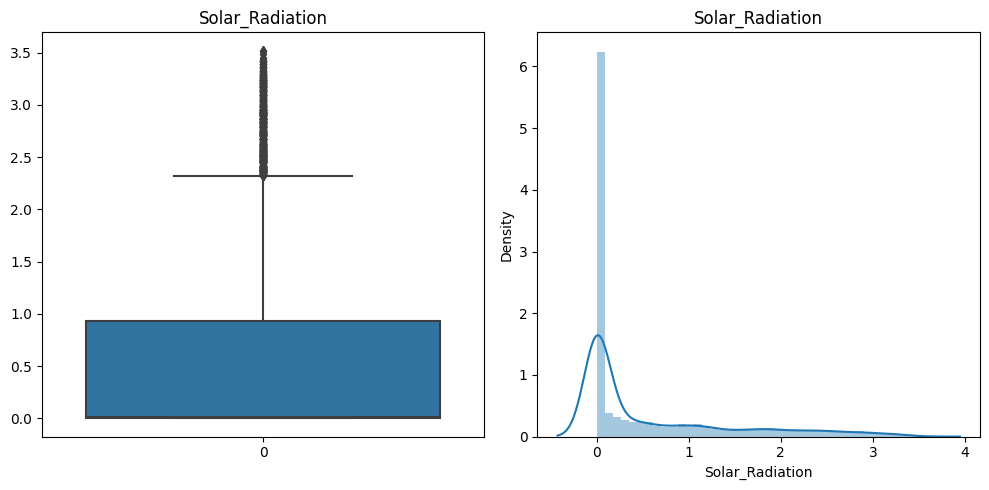

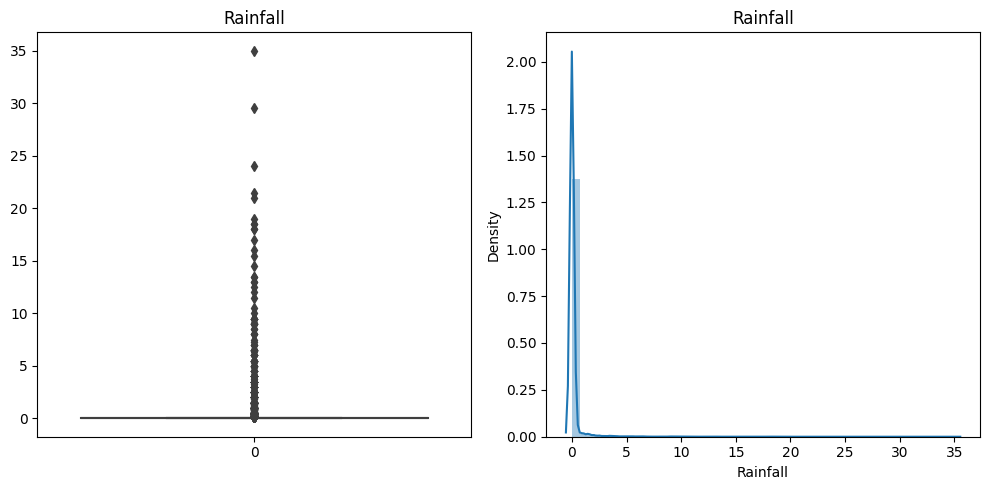

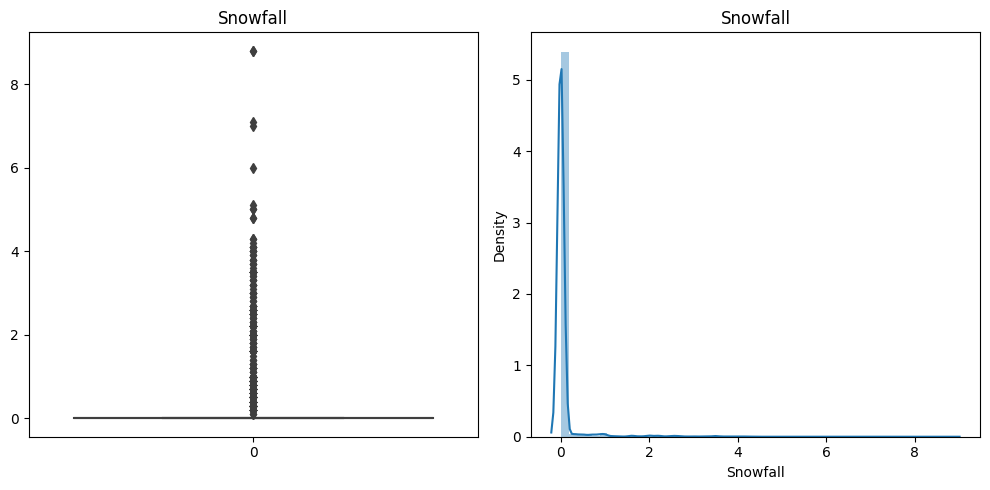

In [396]:
# Perform Univariate Analysis on modified dataframe data
for col in num_dat.columns.to_list():
  #poltting boxplot
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(data[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[col])
    fig.set_title(col)
    plt.tight_layout()
    plt.show()

### **Bi-variate analysis**

## **Regression plot**

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

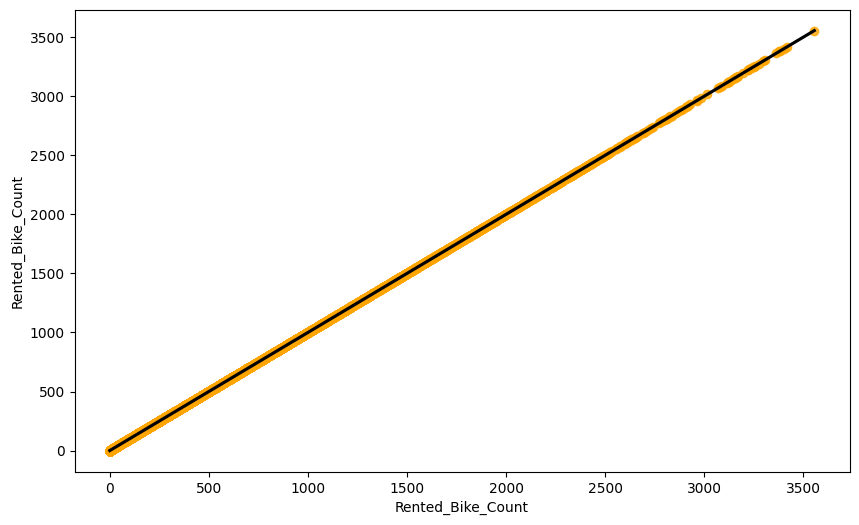

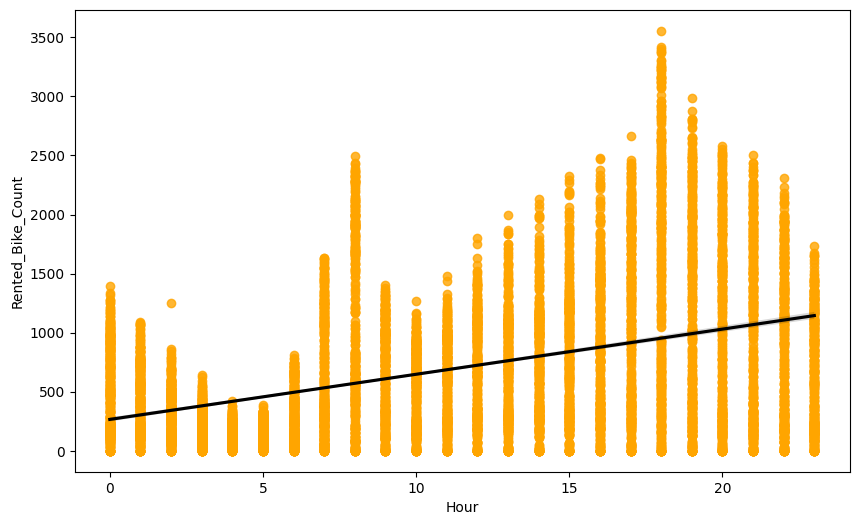

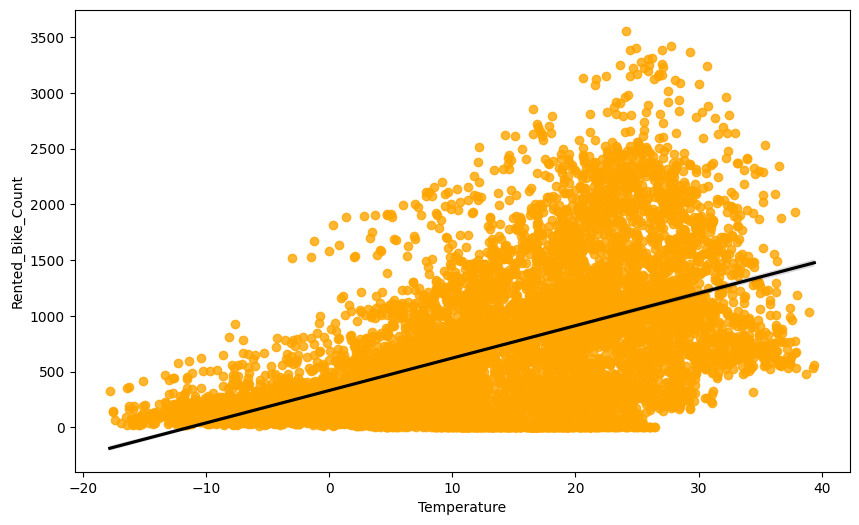

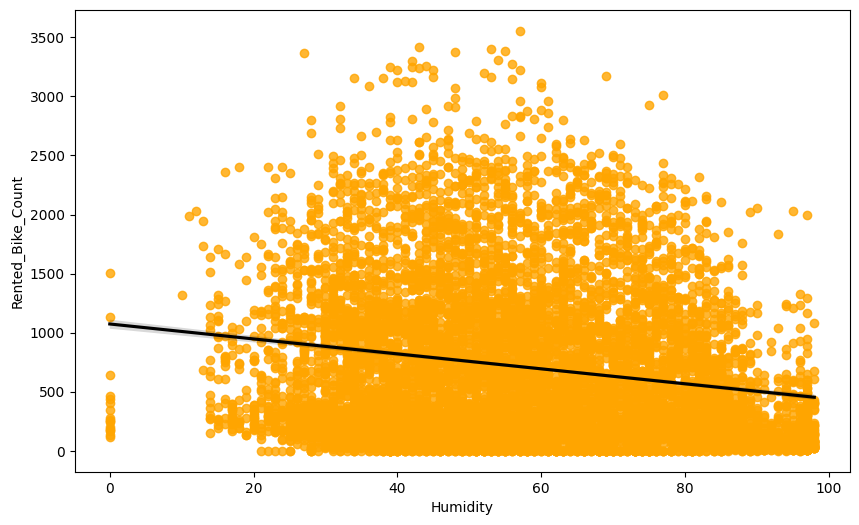

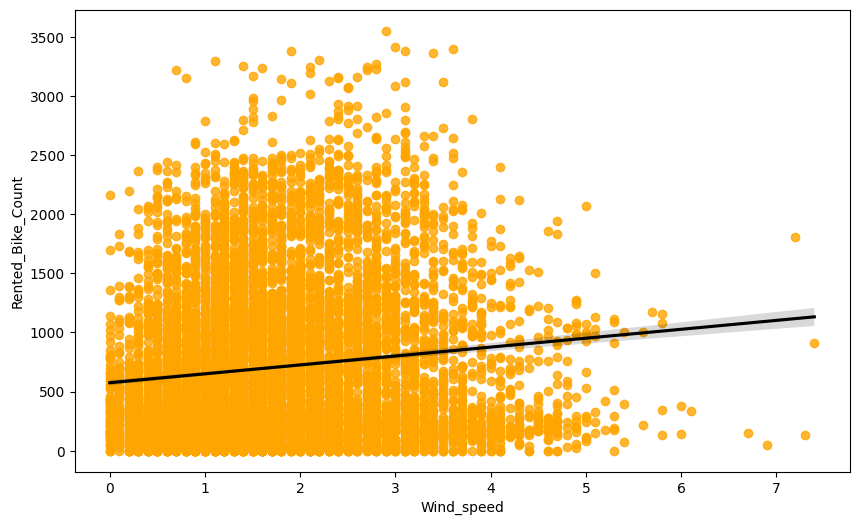

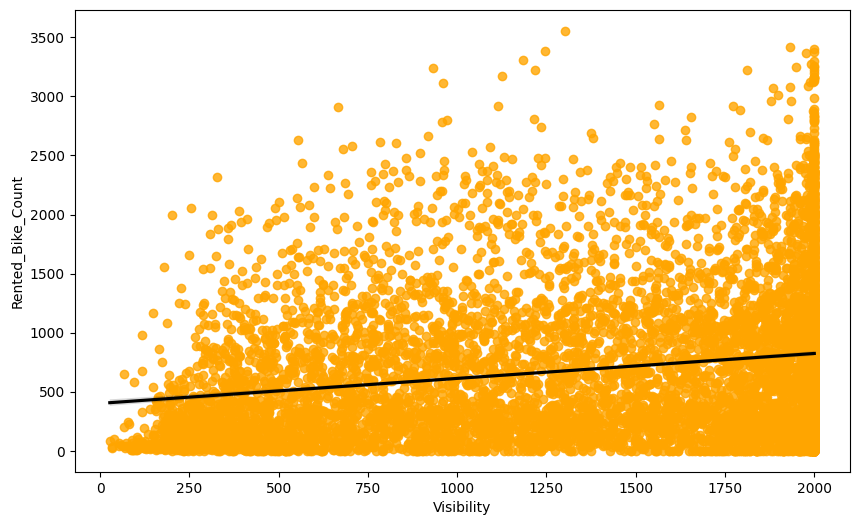

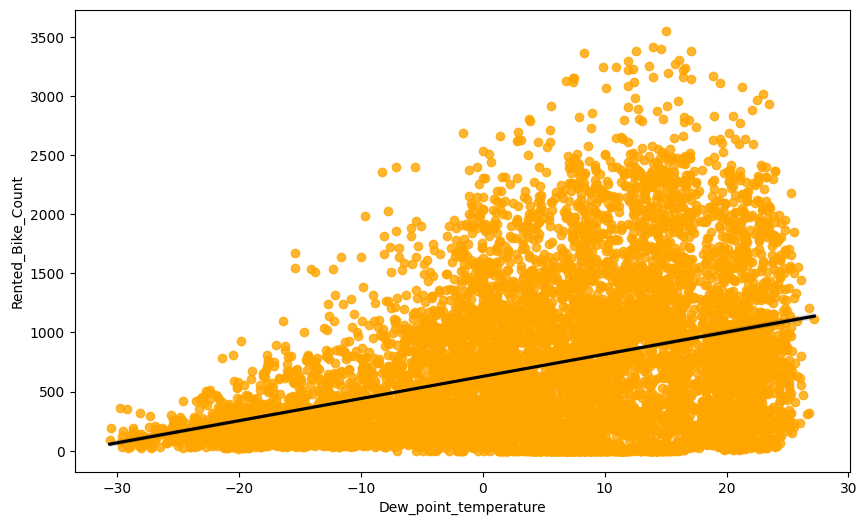

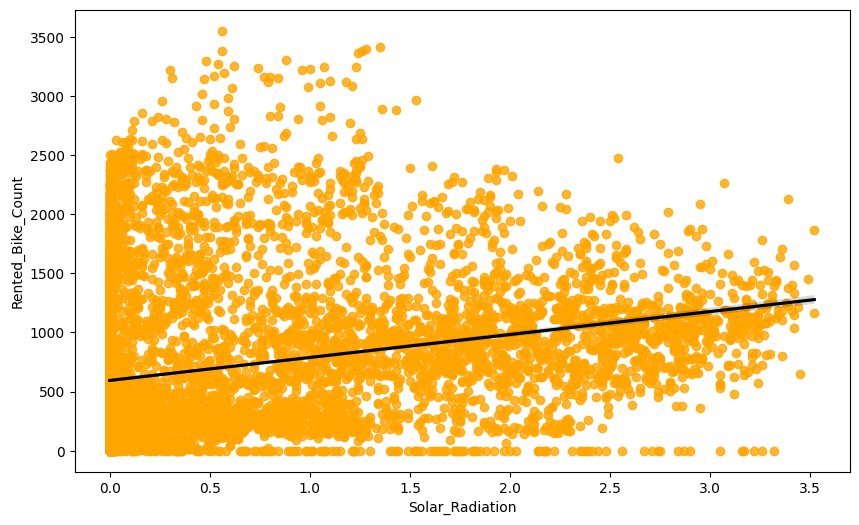

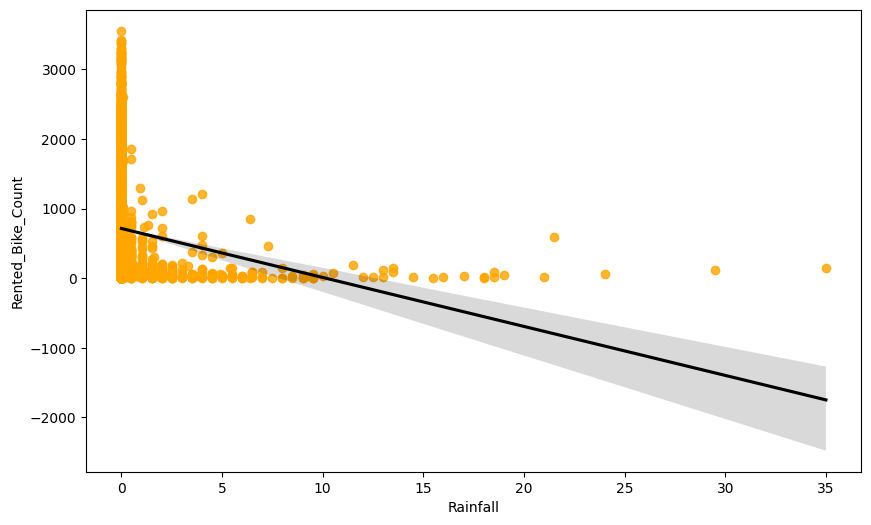

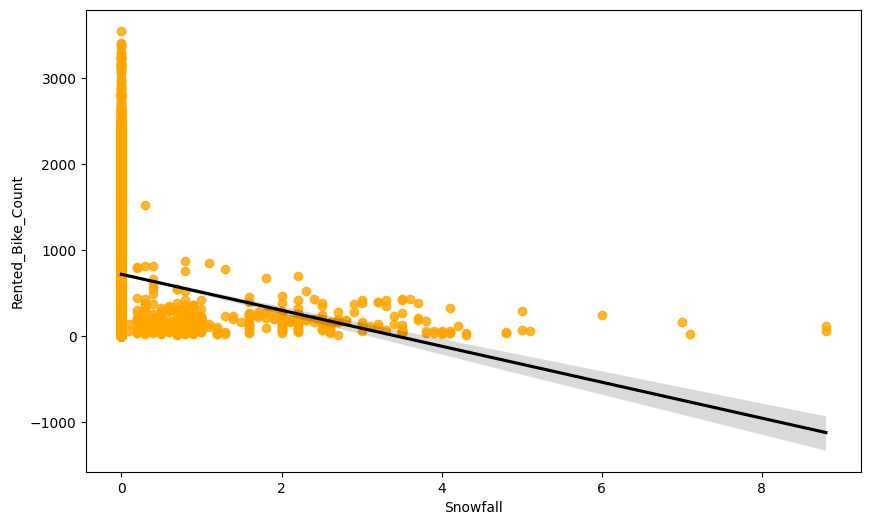

In [397]:
# Let's print the regression plot for all the numerical features
for col in num_dat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[col],y=data['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

*   Why did you pick the specific chart?
1. The scatter plot shows individual data points, while the regression line provides an estimate of the linear relationship between the two variables.

*   What is/are the insight(s) found from the chart?
1. Hour and Temperature are positively correlated with rented bike count.
2. Humidity,Snowfall & Rainfall are negative correlated as compared to other variables.

## **Multivariate** analysis

<Axes: >

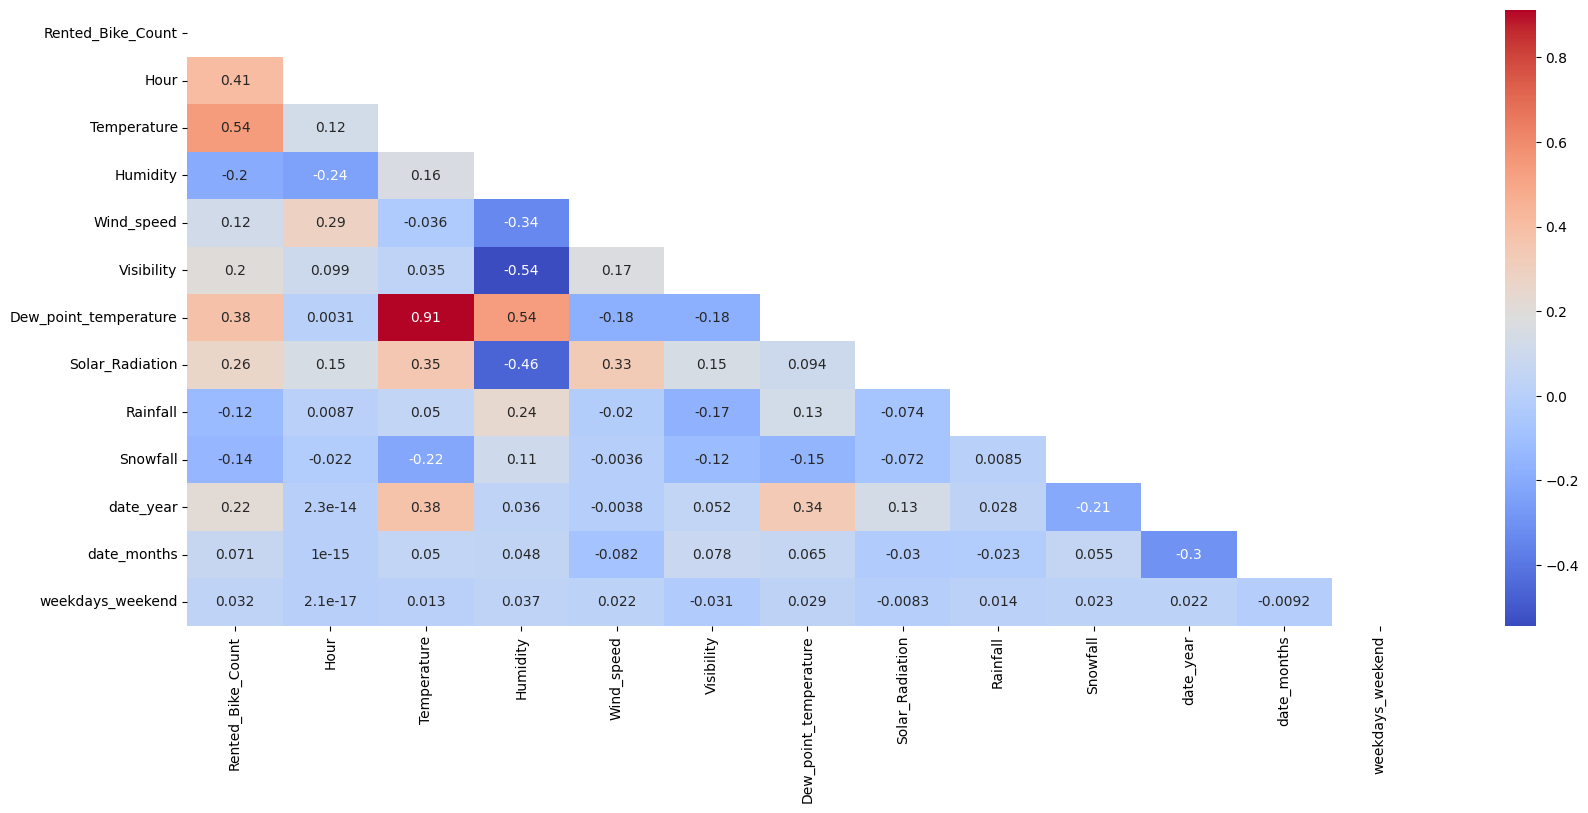

In [398]:
# Let's plot heatmap to see the correlation of feature to each other.
plt.figure(figsize=(20, 8))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')

*   What is/are the insight(s) found from the chart?
1. The heatmap shows that Temperature and Dew point temperature have a strong positive correlation, suggesting the presence of multicollinearity between these variables.
2. Hour and Temperature exhibit a strong correlation with the output variable, indicating their significance for further analysis.

##**Finding Multicollinearity**

In [399]:
# Let's check Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [400]:
# Let's check multicolinarity for data
calc_vif(data[[i for i in data.describe().columns]])

,variables,VIF
0,Rented_Bike_Count,4.169155
1,Hour,5.062576
2,Temperature,189.899790
3,Humidity,188.395184
4,Wind_speed,4.846063
5,Visibility,10.463119
6,Dew_point_temperature,127.229598
7,Solar_Radiation,2.920652
8,Rainfall,1.124048
9,Snowfall,1.134026


In [401]:
# Let's drop Dew point temperature feature because it can create problem and it is also highly correlated with Temperature
data.drop(['Dew_point_temperature'],axis=1, inplace=True)

In [402]:
data.drop(['date_year'],axis=1,inplace=True)

In [403]:
# Finding the boundary values
print("Highest allowed",data['Rented_Bike_Count'].mean() + 3*data['Rented_Bike_Count'].std())
print("Lowest allowed",data['Rented_Bike_Count'].mean() - 3*data['Rented_Bike_Count'].std())

Highest allowed 2639.5944580121673
Lowest allowed -1230.3903484231264


# **Outlier Treatment**

In [404]:
# Handling Outliers & Outlier treatments
# From Univariate Analysis, we have detected quite a bit of outliers in dataframe, we created a fuction to which returns  list of columns containing outliers

def list_of_outlier_columns(data):
 # Define the IQR range for outlier
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
 # Blank list
    outlier_columns = []

    for col in data.columns:
     # Find the lower and upper bounds for outlier detection
      lower_limit = Q1[col] - 1.5 * IQR[col]
      upper_limit = Q3[col] + 1.5 * IQR[col]
      if any(data[col] > upper_limit) or any(data[col] < lower_limit):
          outlier_columns.append(col)
    return outlier_columns

In [405]:
# Let's print list of outlier columns from numericle data
list_of_outlier_columns(num_dat)

['Rented_Bike_Count', 'Wind_speed', 'Solar_Radiation', 'Rainfall', 'Snowfall']

In [406]:
# Let's define our boundary upper and lower.
upper_limit = data['Rented_Bike_Count'].mean() + 3*data['Rented_Bike_Count'].std()
lower_limit = data['Rented_Bike_Count'].mean() - 3*data['Rented_Bike_Count'].std()

In [407]:
# Printing the upper limit and lower limit
print(f'Upper of Rented Bike Count' ,round(upper_limit))
print(f'Lower limit of Rented Bike count' ,round(lower_limit))

Upper of Rented Bike Count 2640
Lower limit of Rented Bike count -1230


In [408]:
# Let's find outlier by appling filter feature
data[(data['Rented_Bike_Count'] > 2639)]

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_months,date_day,weekdays_weekend,Temperature_Bins
3282,2018-04-16,2692,18,17.0,28,3.1,2000,0.88,0.0,0.0,Spring,No Holiday,Yes,4,Monday,1,"(10, 20]"
3498,2018-04-25,2807,18,21.2,32,3.8,1927,0.94,0.0,0.0,Spring,No Holiday,Yes,4,Wednesday,1,"(20, 30]"
3714,2018-04-05,2661,18,17.1,35,3.4,1961,1.11,0.0,0.0,Spring,No Holiday,Yes,4,Thursday,1,"(10, 20]"
3834,2018-09-05,3130,18,20.6,41,2.3,2000,1.10,0.0,0.0,Spring,No Holiday,Yes,9,Wednesday,1,"(20, 30]"
3882,2018-11-05,2701,18,17.9,37,3.1,1819,0.36,0.0,0.0,Spring,No Holiday,Yes,11,Monday,1,"(10, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,2018-09-17,3277,18,25.3,56,2.8,1992,0.54,0.0,0.0,Autumn,No Holiday,Yes,9,Monday,1,"(20, 30]"
7218,2018-09-27,3154,18,22.5,38,0.8,2000,0.31,0.0,0.0,Autumn,No Holiday,Yes,9,Thursday,1,"(20, 30]"
7314,2018-01-10,2857,18,16.6,61,2.9,2000,0.16,0.0,0.0,Autumn,No Holiday,Yes,1,Wednesday,1,"(10, 20]"
7482,2018-08-10,2787,18,18.1,39,1.0,2000,0.21,0.0,0.0,Autumn,No Holiday,Yes,8,Friday,1,"(10, 20]"


* Ensures that any 'Rented_Bike_Count' value that is above the 'upper_limit' is replaced with the 'upper_limit', and any value below the 'lower_limit' is replaced with the 'lower_limit', effectively treating outliers in the dataset.

In [409]:
# Let's create a function for treating outlier.

data['Rented_Bike_Count'] = np.where(
    data['Rented_Bike_Count']>upper_limit,
    upper_limit,
    np.where(
        data['Rented_Bike_Count']<lower_limit,
        lower_limit,
        data['Rented_Bike_Count']
    )
)

<Axes: xlabel='Rented_Bike_Count'>

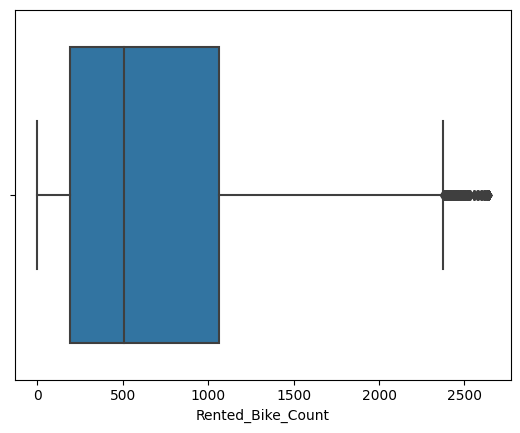

In [410]:
# Let's plot boxplot in order to see outlier's treatment of our dataset.
sns.boxplot(x=data['Rented_Bike_Count'])

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

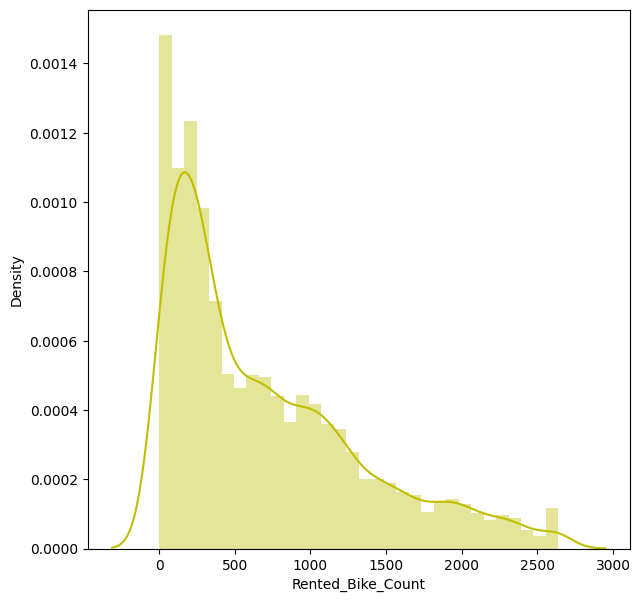

In [411]:
# Let's plot a distplot for Dependent variable Rentend Bike Count
plt.figure(figsize=(7,7))
sns.distplot(data['Rented_Bike_Count'],color="y")

In [412]:
# Let's find out skewness of our Rented Bike Count feature
data['Rented_Bike_Count'].skew()

1.0638389315694605

#**Q-Q chart**

These plots compare the quantiles of the observed data against the quantiles of a theoretical distribution, typically the standard normal distribution. Let's  gain insights into the distributional properties of the data, identify departures from normality, and determine the need for data transformations.

In [413]:
# Let's plot Q-Q plot to see our data

from scipy import stats

def diagnostic_plots(data,variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data[variable].hist()
  plt.subplot(1,2,2)

  stats.probplot(data[variable],dist ='norm', plot=plt)
  plt.show()

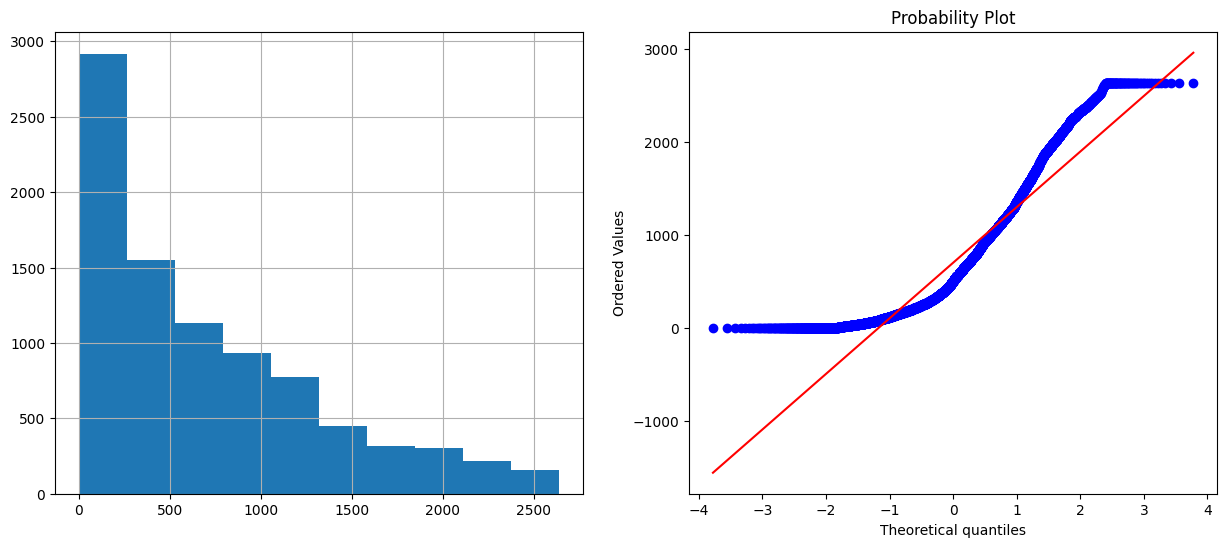

In [414]:
# Let's plot a graph diagnostic plot for Rented Bike Count
diagnostic_plots(data,'Rented_Bike_Count')

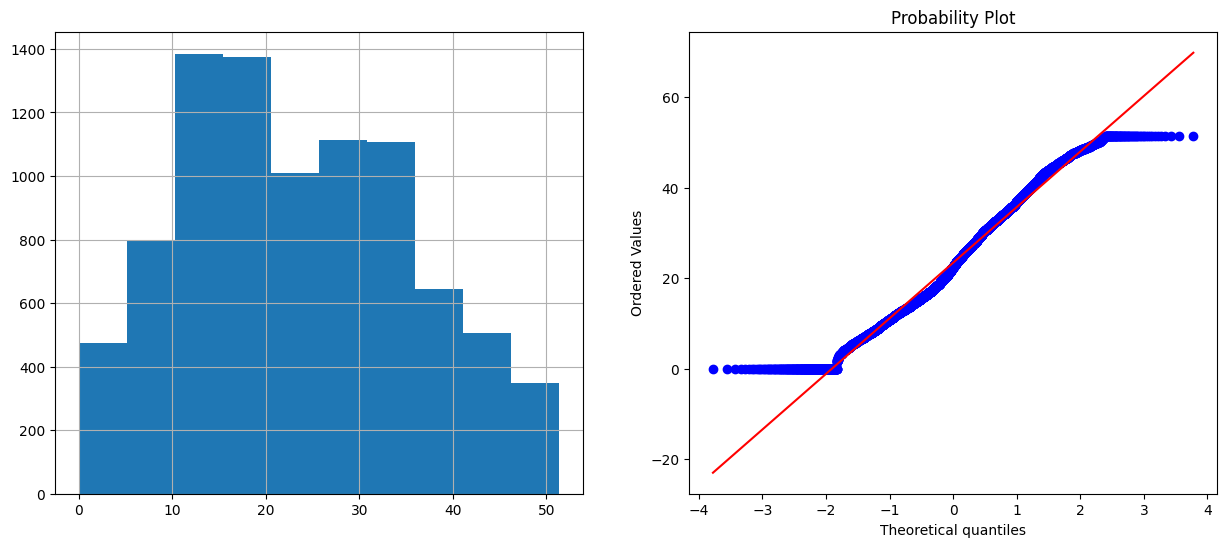

In [415]:
# Sqaure Root Tansformation
data['sqr_Rented_Bike_Count']=data['Rented_Bike_Count']**(1/2)
diagnostic_plots(data,'sqr_Rented_Bike_Count')

In [416]:
# Let's check the skewness of Rented Bike Count
data['Rented_Bike_Count'].skew()

1.0638389315694605

In [417]:
# Let's check the skewness of Rented Bike Count after applying squar root transformation
data['sqr_Rented_Bike_Count'].skew()

0.210280472876656

#**Column Transformation**

Column Transformation is an essential step in preparing data for machine learning models. It involves modifying or encoding the features (columns) of the dataset to improve the performance and effectiveness of the machine learning algorithms.

In [418]:
# Let's apply if else condition in order to see which skewness of our data
# Let's import skew function from scipy.stats library

from scipy.stats import skew

# Calculate skewness of each feature
skewness = num_dat.apply(skew)

# Define the threshold for acceptable skewness
threshold = 0.5

# Check skewness of each feature
for column in skewness.index:
    if abs(skewness[column]) > threshold:
        if skewness[column] < 0:
            print(f"'{column}' is left-skewed with skewness {skewness[column]:.2f}")
        else:
            print(f"'{column}' is right-skewed with skewness {skewness[column]:.2f}")
    else:
        print(f"'{column}' has acceptable skewness")



'Rented_Bike_Count' is right-skewed with skewness 1.15
'Hour' has acceptable skewness
'Temperature' has acceptable skewness
'Humidity' has acceptable skewness
'Wind_speed' is right-skewed with skewness 0.89
'Visibility' is left-skewed with skewness -0.70
'Dew_point_temperature' has acceptable skewness
'Solar_Radiation' is right-skewed with skewness 1.50
'Rainfall' is right-skewed with skewness 14.53
'Snowfall' is right-skewed with skewness 8.44


In [419]:
# Let's categories the right and left skew features.
# Calculate skewness of each feature
skewness = num_dat.apply(skew)

# Define the threshold for acceptable skewness
threshold = 0.5

# Initialize lists for different types of skewness
left_skew_columns = []
right_skew_columns = []
acceptable_skew_columns = []

# Check skewness of each feature
for column in skewness.index:
    if abs(skewness[column]) > threshold:
        if skewness[column] < 0:
            left_skew_columns.append(column)
        else:
            right_skew_columns.append(column)
    else:
        acceptable_skew_columns.append(column)

# Print the results
print("Columns with left skew:")
for column in left_skew_columns:
    print(f"Feature '{column}' is left-skewed with skewness {skewness[column]:.2f}")

print("\nColumns with right skew:")
for column in right_skew_columns:
    print(f"Feature '{column}' is right-skewed with skewness {skewness[column]:.2f}")

print("\nColumns with acceptable skewness:")
for column in acceptable_skew_columns:
    print(f"Feature '{column}' has acceptable skewness")


Columns with left skew:
Feature 'Visibility' is left-skewed with skewness -0.70

Columns with right skew:
Feature 'Rented_Bike_Count' is right-skewed with skewness 1.15
Feature 'Wind_speed' is right-skewed with skewness 0.89
Feature 'Solar_Radiation' is right-skewed with skewness 1.50
Feature 'Rainfall' is right-skewed with skewness 14.53
Feature 'Snowfall' is right-skewed with skewness 8.44

Columns with acceptable skewness:
Feature 'Hour' has acceptable skewness
Feature 'Temperature' has acceptable skewness
Feature 'Humidity' has acceptable skewness
Feature 'Dew_point_temperature' has acceptable skewness


In [420]:
from scipy.stats import yeojohnson

# Assuming 'data' is your DataFrame containing the 'Visibility' column

# Apply the Yeo-Johnson transformation on 'Visibility'
transformed_visibility, lambda_val = yeojohnson(data['Visibility'])

# Create a new column with the transformed values
data['Transformed_Visibility'] = transformed_visibility

# Print the lambda value, which indicates the type of transformation applied
print(f"Lambda value: {lambda_val:.4f}")



Lambda value: 1.4252


Skewness of 'Transformed_Visibility': -0.52


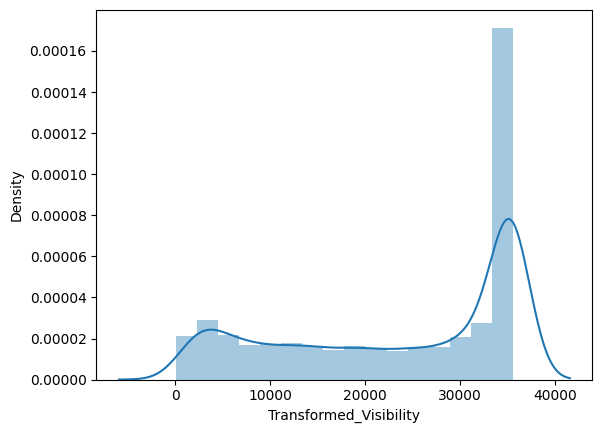

In [421]:
# Calculate the skewness of the 'Visibility' feature
visibility_skewness = data['Transformed_Visibility'].skew()

# Display the skewness value
print(f"Skewness of 'Transformed_Visibility': {visibility_skewness:.2f}")

# Create a distribution plot of 'Visibility'
sns.distplot(data['Transformed_Visibility'])

# Show the plot
plt.show()


*   Why did you pick the specific chart?
1. The distribution plot helps to visualize the distribution of a single variable, in this case, the 'Transformed_Visibility' feature. It provides insights into the shape, spread, and skewness of the data.

*   What is/are the insight(s) found from the chart?
1. After applying the Yeo-Johnson transformation on 'Visibility' column we can skewness of this column's skewness has improved

In [422]:
# Let's check the skewness of Transformed Visibility
data['Transformed_Visibility'].skew()

-0.5208033974294499

In [423]:
# Let's print all column's skewness before applying column transformation.
for col in right_skew_columns:
  print(col,data[col].skew())

Rented_Bike_Count 1.0638389315694605
Wind_speed 0.8909547980299266
Solar_Radiation 1.5040397173602802
Rainfall 14.5332322425467
Snowfall 8.440800781484777


In [424]:
# Let's apply square root column transformation to all right skew column
for column in right_skew_columns:
  data[column]=np.sqrt(num_dat[column])

In [425]:
# Let's print all column's skewness after applying column transformation.
for col in right_skew_columns:
  print(col,data[col].skew())

Rented_Bike_Count 0.237362090985412
Wind_speed -0.005368836345296517
Solar_Radiation 0.8075034623392892
Rainfall 6.6351459550336935
Snowfall 5.31480696909106


In [426]:
# Let's explore our data again.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8760 non-null   datetime64[ns]
 1   Rented_Bike_Count       8760 non-null   float64       
 2   Hour                    8760 non-null   int64         
 3   Temperature             8760 non-null   float64       
 4   Humidity                8760 non-null   int64         
 5   Wind_speed              8760 non-null   float64       
 6   Visibility              8760 non-null   int64         
 7   Solar_Radiation         8760 non-null   float64       
 8   Rainfall                8760 non-null   float64       
 9   Snowfall                8760 non-null   float64       
 10  Seasons                 8760 non-null   object        
 11  Holiday                 8760 non-null   object        
 12  Functioning_Day         8760 non-null   object  

In [427]:
# Let's drop unwanted feature which is not useful for modeling.
data.drop(['Date','Rented_Bike_Count','Visibility','Temperature_Bins'],axis=1 , inplace=True)

In [428]:
# Let's generate a descriptive summary of the dataset using the describe() function
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.000000,5.750000,11.500000,17.250000,23.000000
Temperature,8760.0,12.882922,11.944825,-17.800000,3.500000,13.700000,22.500000,39.400000
Humidity,8760.0,58.226256,20.362413,0.000000,42.000000,57.000000,74.000000,98.000000
Wind_speed,8760.0,1.249599,0.404264,0.000000,0.948683,1.224745,1.516575,2.720294
Solar_Radiation,8760.0,0.478866,0.582955,0.000000,0.000000,0.100000,0.964365,1.876166
Rainfall,8760.0,0.077869,0.377677,0.000000,0.000000,0.000000,0.000000,5.916080
Snowfall,8760.0,0.056576,0.268097,0.000000,0.000000,0.000000,0.000000,2.966479
date_months,8760.0,6.526027,3.448048,1.000000,4.000000,7.000000,10.000000,12.000000
weekdays_weekend,8760.0,0.709589,0.453978,0.000000,0.000000,1.000000,1.000000,1.000000
sqr_Rented_Bike_Count,8760.0,23.418092,12.389224,0.000000,13.820275,22.461075,32.638167,51.376984


#  Feature Engineering

In [429]:
# Let's Assign all catagoriacla features to a variable
categorical_features=list(data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day', 'date_day'], dtype='object')

In [430]:
# Let's check the first 5 rows of our dataset
data.head()

,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date_months,date_day,weekdays_weekend,sqr_Rented_Bike_Count,Transformed_Visibility
0,0,-5.2,37,1.483240,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,1,15.937377,35578.782659
1,1,-5.5,38,0.894427,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,1,14.282857,35578.782659
2,2,-6.0,39,1.000000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,1,13.152946,35578.782659
3,3,-6.2,40,0.948683,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,1,10.344080,35578.782659
4,4,-6.0,36,1.516575,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,1,8.831761,35578.782659


In [431]:
# Let's apply one-hot encoding on categorical features
data = pd.get_dummies(data, columns=['Seasons', 'Holiday', 'Functioning_Day','date_day'])

In [432]:
# Let's see statstical aspect about our data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.000000,5.750000,11.500000,17.250000,23.000000
Temperature,8760.0,12.882922,11.944825,-17.800000,3.500000,13.700000,22.500000,39.400000
Humidity,8760.0,58.226256,20.362413,0.000000,42.000000,57.000000,74.000000,98.000000
Wind_speed,8760.0,1.249599,0.404264,0.000000,0.948683,1.224745,1.516575,2.720294
Solar_Radiation,8760.0,0.478866,0.582955,0.000000,0.000000,0.100000,0.964365,1.876166
Rainfall,8760.0,0.077869,0.377677,0.000000,0.000000,0.000000,0.000000,5.916080
Snowfall,8760.0,0.056576,0.268097,0.000000,0.000000,0.000000,0.000000,2.966479
date_months,8760.0,6.526027,3.448048,1.000000,4.000000,7.000000,10.000000,12.000000
weekdays_weekend,8760.0,0.709589,0.453978,0.000000,0.000000,1.000000,1.000000,1.000000
sqr_Rented_Bike_Count,8760.0,23.418092,12.389224,0.000000,13.820275,22.461075,32.638167,51.376984


## Model Testing

####Linear Regression

In [433]:
# Let's Split the data into training and testing datasets

X = data.drop('sqr_Rented_Bike_Count', axis=1)  # Replace 'target_variable' with the name of your target column
y = data['sqr_Rented_Bike_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the machine learning model
model = LinearRegression()  # Replace with your desired algorithm
model.fit(X_train, y_train)

# Make predictions on training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy scores
train_accuracy_m = mean_squared_error(y_train, train_predictions)
test_accuracy_m = mean_squared_error(y_test, test_predictions)

# Calculate accuracy scores
train_accuracy_r = r2_score(y_train, train_predictions)
test_accuracy_r = r2_score(y_test, test_predictions)

print("Training Accuracy mean squared error:", train_accuracy_m)
print("Testing Accuracy mean squared error:", test_accuracy_m)

print("Training Accuracy r2 score :", train_accuracy_r)
print("Testing Accuracy r2 score :", test_accuracy_r)

Training Accuracy mean squared error: 49.02554888894531
Testing Accuracy mean squared error: 51.34043670077412
Training Accuracy r2 score : 0.6811477726483723
Testing Accuracy r2 score : 0.6630129477686353


1. The mean squared error (MSE) is around 50 for both training and testing data, indicating some level of prediction error.
2. The R-squared (R2) scores are approximately 0.68 for training and 0.66 for testing, indicating that the model explains about two-thirds of the variance in the data.

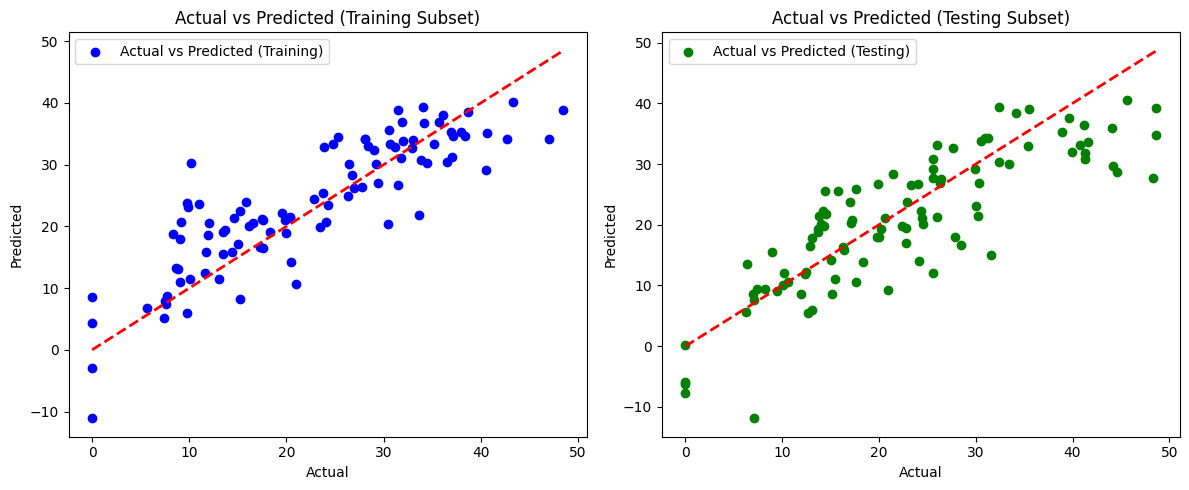

In [434]:
# Let's Convert y_train and y_test to Pandas Series if they are NumPy arrays

if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)
if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test)

# Select a subset of data
subset_size = 100  # Specify the desired subset size
random_indices = np.random.choice(range(len(y_train)), size=subset_size, replace=False)
y_train_subset = y_train.iloc[random_indices]
train_predictions_subset = train_predictions[random_indices]

random_indices = np.random.choice(range(len(y_test)), size=subset_size, replace=False)
y_test_subset = y_test.iloc[random_indices]
test_predictions_subset = test_predictions[random_indices]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the actual values vs predicted values for training data subset
axs[0].scatter(y_train_subset, train_predictions_subset, color='blue', label='Actual vs Predicted (Training)')
axs[0].plot([min(y_train_subset), max(y_train_subset)], [min(y_train_subset), max(y_train_subset)], color='red', linestyle='--', linewidth=2)
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Actual vs Predicted (Training Subset)')
axs[0].legend()

# Plotting the actual values vs predicted values for testing data subset
axs[1].scatter(y_test_subset, test_predictions_subset, color='green', label='Actual vs Predicted (Testing)')
axs[1].plot([min(y_test_subset), max(y_test_subset)], [min(y_test_subset), max(y_test_subset)], color='red', linestyle='--', linewidth=2)
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Actual vs Predicted (Testing Subset)')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots side by side
plt.show()


*   Why did you pick the specific chart?
1. The scatter plot is used to compare the actual values and predicted values of the target variable (bike rental count) for both the training and testing data subsets.

*   What is/are the insight(s) found from the chart?
1. By seeing accuracy of matrix we can say that The model shows moderately accurate predictions for bike rental counts.  

In [437]:
# Let's import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [438]:
# Let's check the score
reg.score(X_train, y_train)
# let's get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [439]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 49.02554888894531
RMSE : 7.001824682819851
MAE : 5.429544851639237
R2 : 0.6811477726483723
Adjusted R2 : 0.6765294031907879


In [440]:
# Let's store the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [441]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 51.34043670077412
RMSE : 7.165224120763713
MAE : 5.494736795337621
R2 : 0.6630129477686353
Adjusted R2 : 0.6581319070352725


**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [442]:
# Let's store the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

####Lasso Regression

In [443]:
# Let's Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Lasso model
lasso = Lasso(alpha=0.01)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6704450682860954 0.6796679029353787


In [444]:
# let's get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [445]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 48.525835719893266
RMSE : 6.966048788222293
MAE : 5.402117208435566
R2 : 0.6796679029353787
Adjusted R2 : 0.6759672086532089


**Looks like our r2 score value is 0.67 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [446]:
# Let's store the test set metrics value in a dataframe for later comparison

dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [447]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 52.545325188611685
RMSE : 7.248815433476817
MAE : 5.575163434945808
R2 : 0.6704450682860954
Adjusted R2 : 0.6666378255444837


In [448]:
# Let's store the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

# **RIDGE REGRESSION**


In [457]:
# Assuming you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.6630173529651642


The r2_score for the test set is 0.66. This means our linear model is  performing not very well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [449]:
# Let's import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [450]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [451]:
# Let's check the score
ridge.score(X_train, y_train)

0.6796805118219948

In [452]:
# Let's get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [453]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 48.523925649793654
RMSE : 6.965911688343002
MAE : 5.401478956877836
R2 : 0.6796805118219948
Adjusted R2 : 0.67597996320626


**Looks like our r2 score value is 0.68 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [454]:
# Let's store the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [455]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 52.56104312380071
RMSE : 7.249899525083138
MAE : 5.57593323837689
R2 : 0.6703464881928272
Adjusted R2 : 0.6665381065869217


In [456]:
# Let's store the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

# **ELASTIC NET REGRESSION**

In [458]:
# Let's import the library
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [459]:
# Let's FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [460]:
# Let's check the score
elasticnet.score(X_train, y_train)

0.6335607172079352

In [461]:
# Let's get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [462]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 56.34235997837612
RMSE : 7.506154806448913
MAE : 5.784764746716288
R2 : 0.6335607172079352
Adjusted R2 : 0.6282530798557906


**Looks like our r2 score value is 0.63 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [463]:
# Let's store the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [464]:
# Let's calculates and prints various evaluation metrics for a regression model.

# calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 56.90707425002256
RMSE : 7.543677766847054
MAE : 5.768600235617783
R2 : 0.626474793847296
Adjusted R2 : 0.6210645214522684


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


change it

In [465]:
# Let's store the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

# **RANDOM FOREST**

In [466]:

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [467]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [468]:
# Let's calculates and prints various evaluation metrics for a regression model.

print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9894597083400553
MSE : 1.6206365825649494
RMSE : 1.2730422548230476
MAE : 0.8270255654234049
R2 : 0.9894597083400553
Adjusted R2 : 0.98930703899388


**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [469]:
# Let's store the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [470]:
# Let's calculates and prints various evaluation metrics for a regression model.

# calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 11.883046771174897
RMSE : 3.4471795385756887
MAE : 2.251772594539199
R2 : 0.9220023599276224
Adjusted R2 : 0.920872614271881


**The r2_score for the test set is 0.92. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [471]:
# Let's store the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [472]:
# Let's creates a DataFrame (importance_df) containing the feature names
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [473]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [474]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [475]:
# Let's retrieve the feature importances from a trained random forest model
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [476]:
import plotly.graph_objects as go

# Define the figure layout
fig = go.Figure()

# Create the horizontal bar chart
fig.add_trace(go.Bar(
    y=[features[i] for i in indices],
    x=importances[indices],
    orientation='h',
    marker=dict(color="rgb(128, 0, 0)")
))

# Set the title and axis labels
fig.update_layout(
    title='Feature Importance',
    xaxis_title='Relative Importance',
    yaxis_title=None
)

# Show the figure
fig.show()


# **GRADIENT BOOSTING**

In [477]:

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [478]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [479]:
# Let's calculates and prints various evaluation metrics for a regression model.

print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8918926029810588
MSE : 16.622196814588662
RMSE : 4.077032844433395
MAE : 2.96362302996726
R2 : 0.8918926029810588
Adjusted R2 : 0.8903267368596952


**Looks like our r2 score value is 0.89 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [480]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [481]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 19.093514219466922
RMSE : 4.369612593750952
MAE : 3.1396454196749657
R2 : 0.8746744771366779
Adjusted R2 : 0.872859217535529


The r2_score for the test set is 0.87. This means our linear model is  performing well on the data.


In [482]:
# let's store the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# gb_model.feature_importances_

In [483]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [484]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [485]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.31
0,Hour,0.25
17,Functioning_Day_Yes,0.11
2,Humidity,0.09
16,Functioning_Day_No,0.08
5,Rainfall,0.06
13,Seasons_Winter,0.04
4,Solar_Radiation,0.03
10,Seasons_Autumn,0.02
23,date_day_Tuesday,0.00


In [486]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [487]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

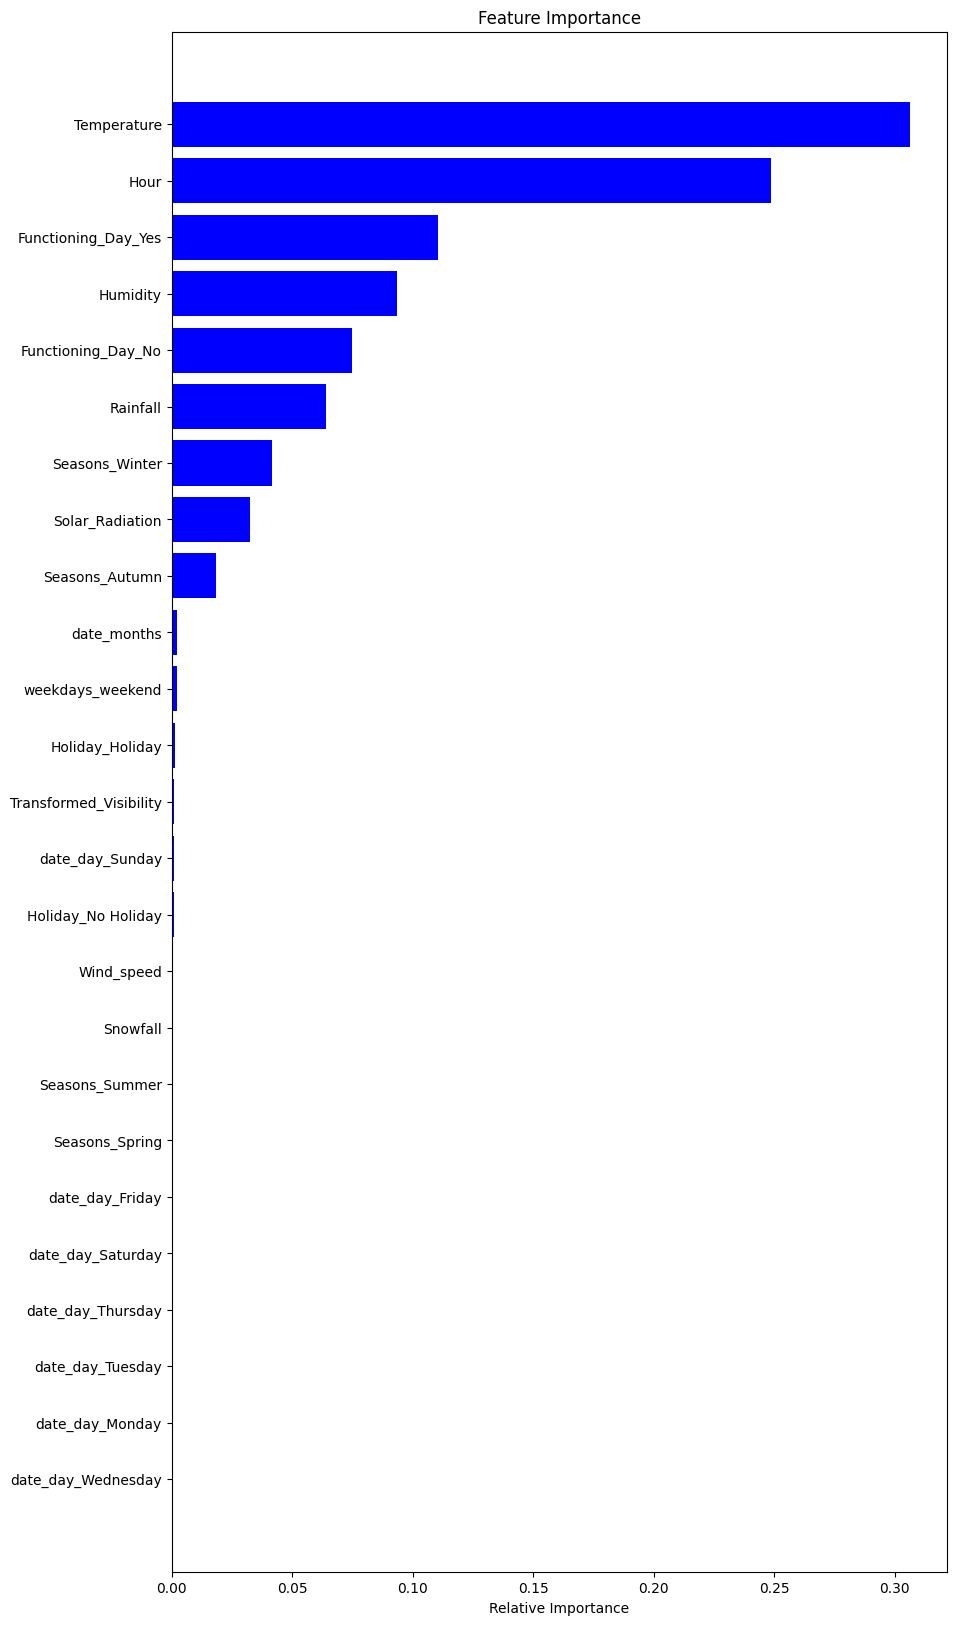

In [488]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**

In [489]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

### **Importing Gradient Boosting Regressor**

In [490]:
# Instantiate the Random Forest regressor with the given hyperparameters
rf_regressor = RandomForestRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100)

# Train the regressor using your training data
rf_regressor.fit(X_train, y_train)

# Make predictions on new data
predictions = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)


Mean Squared Error: 22.51887759378657


In [491]:

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [510]:
# Let's represent the model with the optimal hyperparameter values.
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [492]:
# Let's assign the best estimator to the gb_optimal_model variable.
gb_optimal_model = gb_grid.best_estimator_

In [493]:
# Let's retrieve the best parameters found during the grid search optimization process
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [494]:
# Let's Make predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [495]:
# Let's store the test set metrics value in a dataframe for later comparison

print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9577953955273806
MSE : 6.489225172102104
RMSE : 2.5473957627549955
MAE : 1.7193865405243522
R2 : 0.9577953955273806
Adjusted R2 : 0.9571840889736056


In [496]:
# Let's store the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [497]:
# Let's calculates and prints various evaluation metrics for a regression model.

MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)

r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 11.459305970738566
RMSE : 3.3851596669490442
MAE : 2.254982676353225
R2 : 0.9247836990128633
Adjusted R2 : 0.9236942392650774


In [498]:
# storing the test set metrics value in a dataframe for later comparison.

dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [499]:
# Let's featch the important features arry
gb_optimal_model.feature_importances_

array([0.25599594, 0.2888282 , 0.08260375, 0.00439807, 0.04335276,
       0.07539019, 0.00084695, 0.01080248, 0.01053196, 0.0058882 ,
       0.00781338, 0.00342158, 0.0012597 , 0.04269175, 0.00144404,
       0.0009573 , 0.05237775, 0.10582444, 0.00053707, 0.00102946,
       0.00138119, 0.00132977, 0.00035647, 0.00039317, 0.00054443])

In [500]:
# Let's store the feature importances from your gradient boosting model.

importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [501]:
# Let's round the values in the 'Feature Importance' column to two decimal places.

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [502]:
# Let's sort the Importance features using sort_values function.

importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Temperature,0.29
0,Hour,0.26
17,Functioning_Day_Yes,0.11
5,Rainfall,0.08
2,Humidity,0.08
16,Functioning_Day_No,0.05
4,Solar_Radiation,0.04
13,Seasons_Winter,0.04
7,date_months,0.01
8,weekdays_weekend,0.01


In [503]:
# Let's fit the model on traing dataset.
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [504]:
# Let's determine the feature importances with help of gradient boosting model.

features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

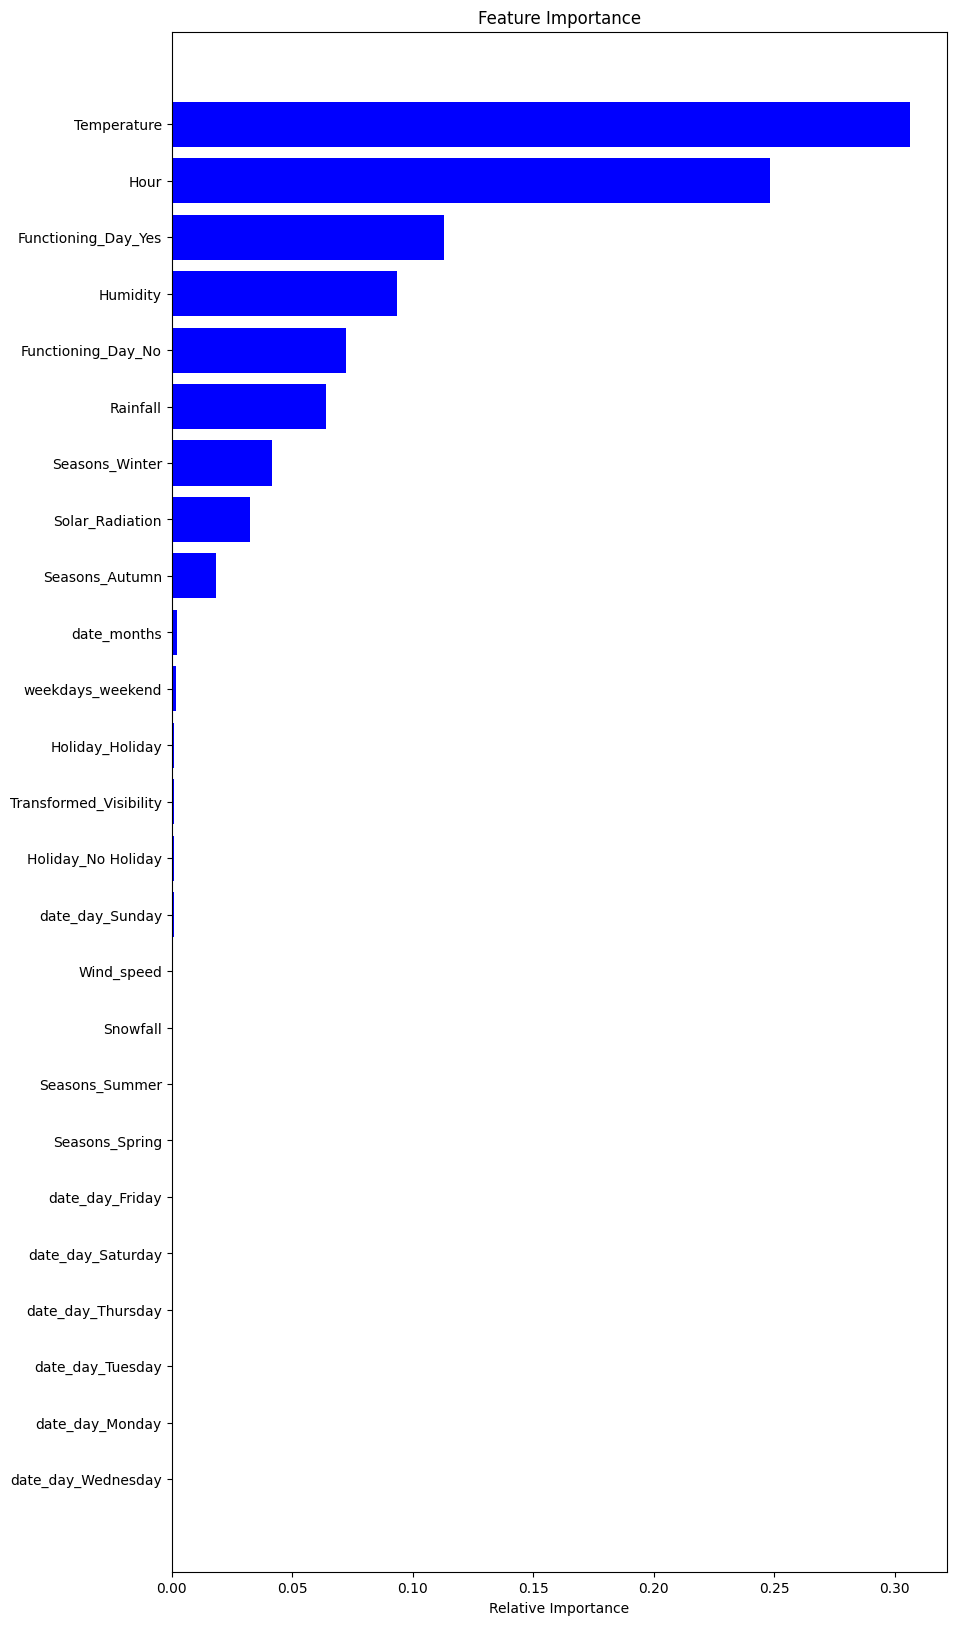

In [505]:
# Let's Plot the bar chart in order to see the feature importance.
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [506]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   5.430  49.026  7.002   
             1                Lasso regression   5.402  48.526  6.966   
             2                Ridge regression   5.401  48.524  6.966   
             3          Elastic net regression   5.785  56.342  7.506   
             4        Random forest regression   0.827   1.621  1.273   
             5    Gradient boosting regression   2.964  16.622  4.077   
             6  Gradient Boosting gridsearchcv   1.719   6.489  2.547   
Test set     0               Linear regression   5.495  51.340  7.165   
             1                Lasso regression   5.575  52.545  7.249   
             2                Ridge regression   5.576  52.561  7.250   
             3      Elastic net regression Test  5.769  56.907  7.544   
             4        Random forest regression   2.252  11.883  3.447   
             5    Gradient boosting regression   3.140  19.094  4.370   
             6  Gradient Boosting gridsearchcv   2.255  11.459  3.385   

                R2_score  Adjusted R2  
Training set 0     0.681         0.68  
             1     0.680         0.68  
             2     0.680         0.68  
             3     0.634         0.63  
             4     0.989         0.99  
             5     0.892         0.89  
             6     0.958         0.96  
Test set     0     0.663         0.66  
             1     0.670         0.67  
             2     0.670         0.67  
             3     0.626         0.62  
             4     0.922         0.92  
             5     0.875         0.87  
             6     0.925         0.92

In [507]:
#Installing the shap library
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.7 MB/s eta 0:00:00


In [508]:
import xgboost as xgb

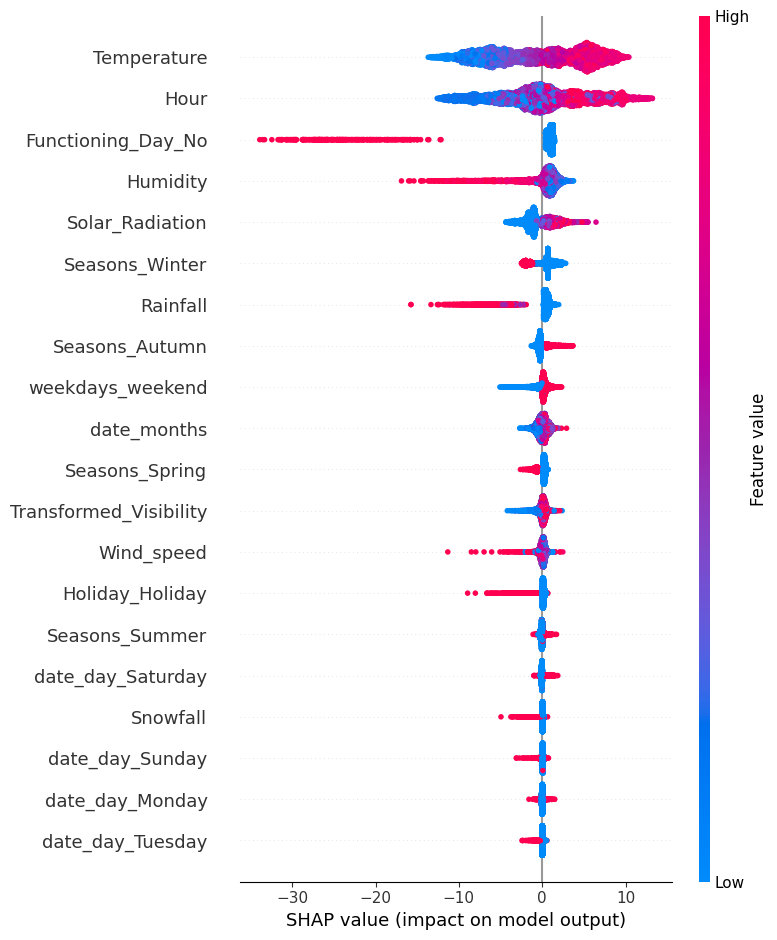

In [509]:

# Train XGBoost model
x_train = data.drop(columns=['sqr_Rented_Bike_Count'])  # Your transformed features (excluding the target variable)
y_train = data['sqr_Rented_Bike_Count']  # Your target variable
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(x_train)
# Generate the summary plot
shap.summary_plot(shap_values, x_train)
plt.show()

* SHAP analysis identified "Temperature" and "hour" as the most important features in the model, indicating their significant contributions to the prediction process.

# **Conclusion**

- Seasonal analysis reveals a strong positive correlation between summer and bike rentals, while winter exhibits the lowest rental demand.
- Non-holiday days account for more than 59% of bike rentals, indicating a higher preference for rentals during regular working days.
- Bike rentals demonstrate a peak pattern within the temperature range of 15 to 30 degrees, suggesting optimal weather conditions for renting bikes.
- Bike rentals are more prevalent on days without precipitation, indicating a preference for dry weather conditions.
- High visibility conditions positively influence bike rentals, suggesting that better visibility attracts more customers.
- On non-holiday days, the average bike rental count exceeds that of holidays, indicating higher demand during regular weekdays.
- Non-functional days have no bike rentals, while functional days witness an average of 730 bike rentals.
- March and June exhibit the highest bike rental counts, whereas April and July record no bike rentals.

ML Model Results:

### **Best performing model**

**Gradient Boosting gridsearchcv** algorithm gives the best result

* MAE : 2.254982676353225
* R2 : 0.9247836990128633
* Adjusted R2 : 0.9236942392650774

### **Worst performing model**

**Elastic net regression** algorithm gives the worst result

* MAE : 5.768600235617783
* R2 : 0.626474793847296
* Adjusted R2 : 0.6210645214522684
